In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno 

import chart_studio.plotly as py
import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import os 

print(os.listdir('./input'))

['sample_submission.csv', 'test.csv', 'train.csv']


In [3]:
# matplotlib setting
plt.rc('font', size=12) 
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=12) 
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12) 
plt.rc('legend', fontsize=12) 
plt.rc('figure', titlesize=14) 
plt.rcParams['figure.dpi'] = 300
sns.set_style("whitegrid")

colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.set_palette(sns.xkcd_palette(colors))

In [4]:
train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')
train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


In [5]:
target, train_id = train['target'], train['id']
test_id = test['id']
train.drop(['id'], axis=1, inplace=True)
test.drop(['id'], axis=1, inplace=True)
print(train.shape)
print(test.shape)

(600000, 24)
(400000, 23)


In [6]:
print(train.columns)

Index(['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1', 'nom_2',
       'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9', 'ord_0',
       'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month', 'target'],
      dtype='object')


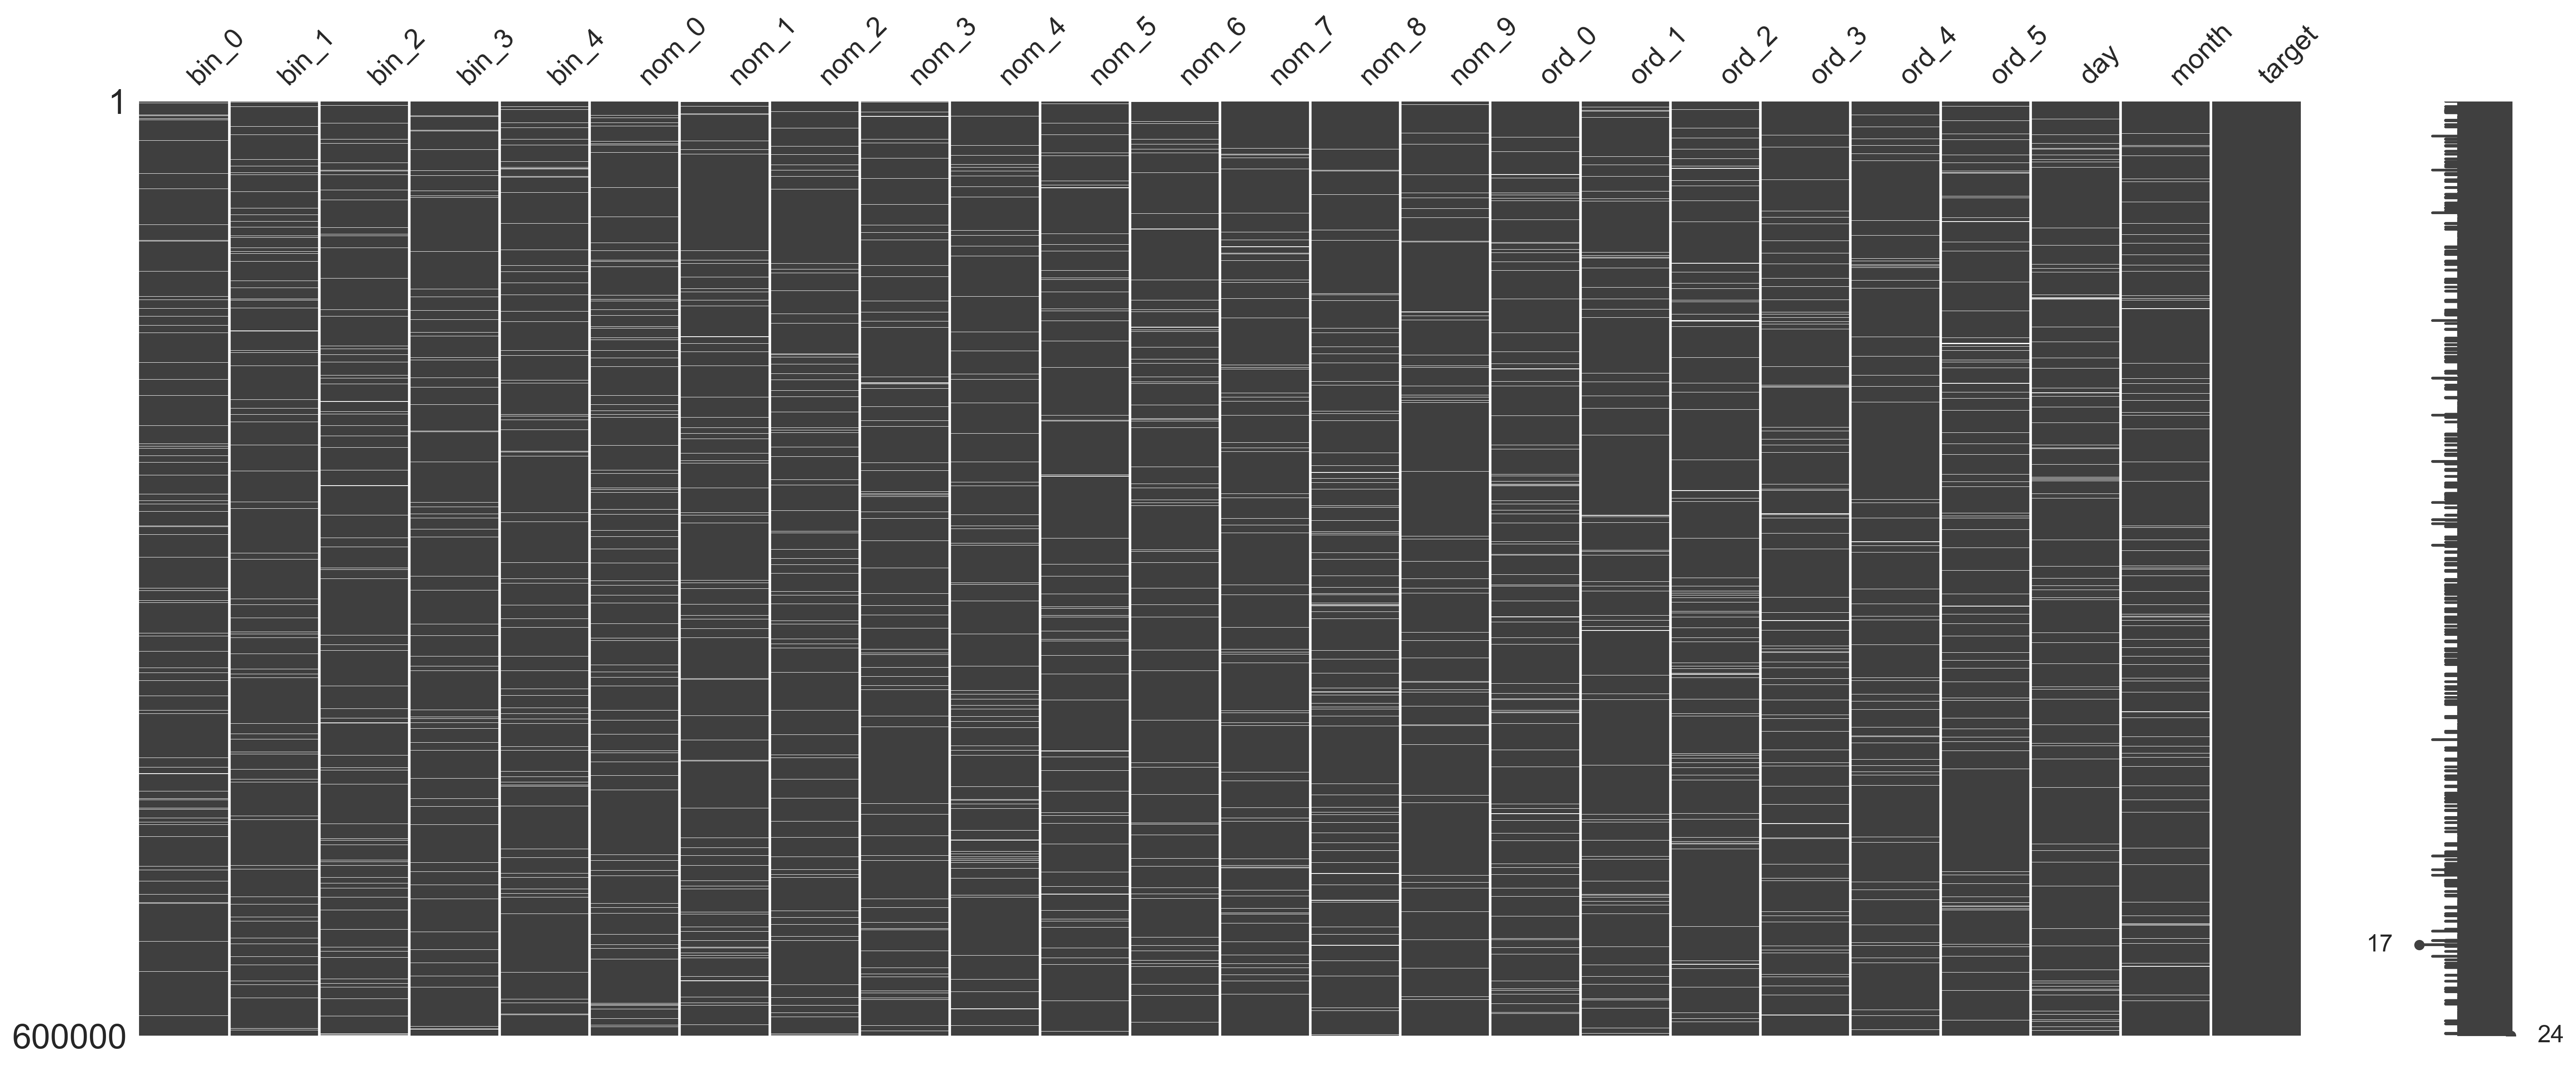

In [7]:
msno.matrix(train)

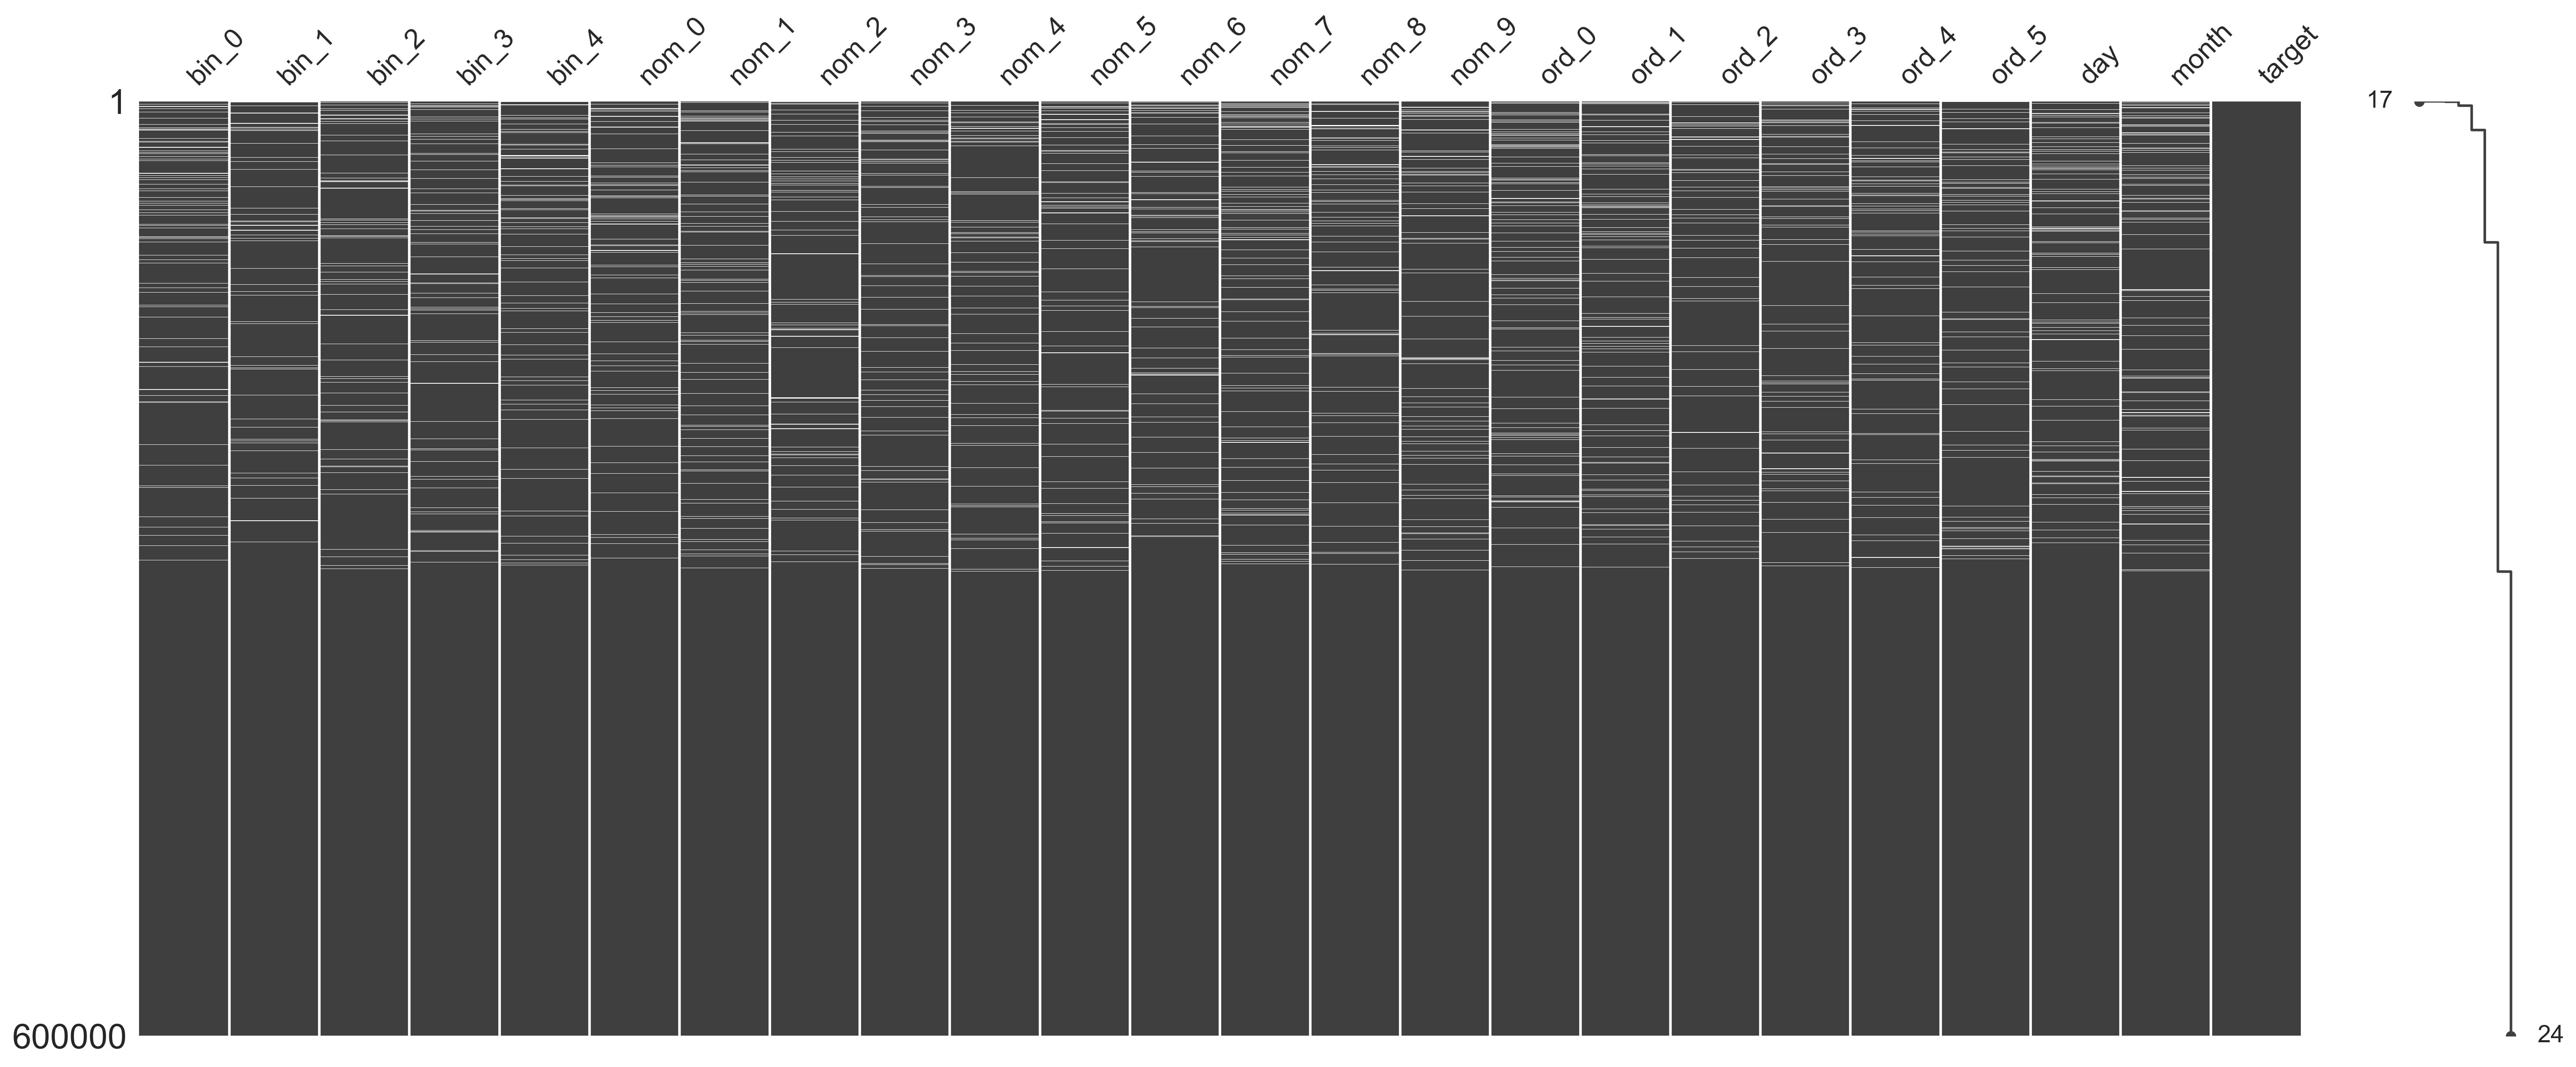

In [8]:
msno.matrix(train, sort='ascending')

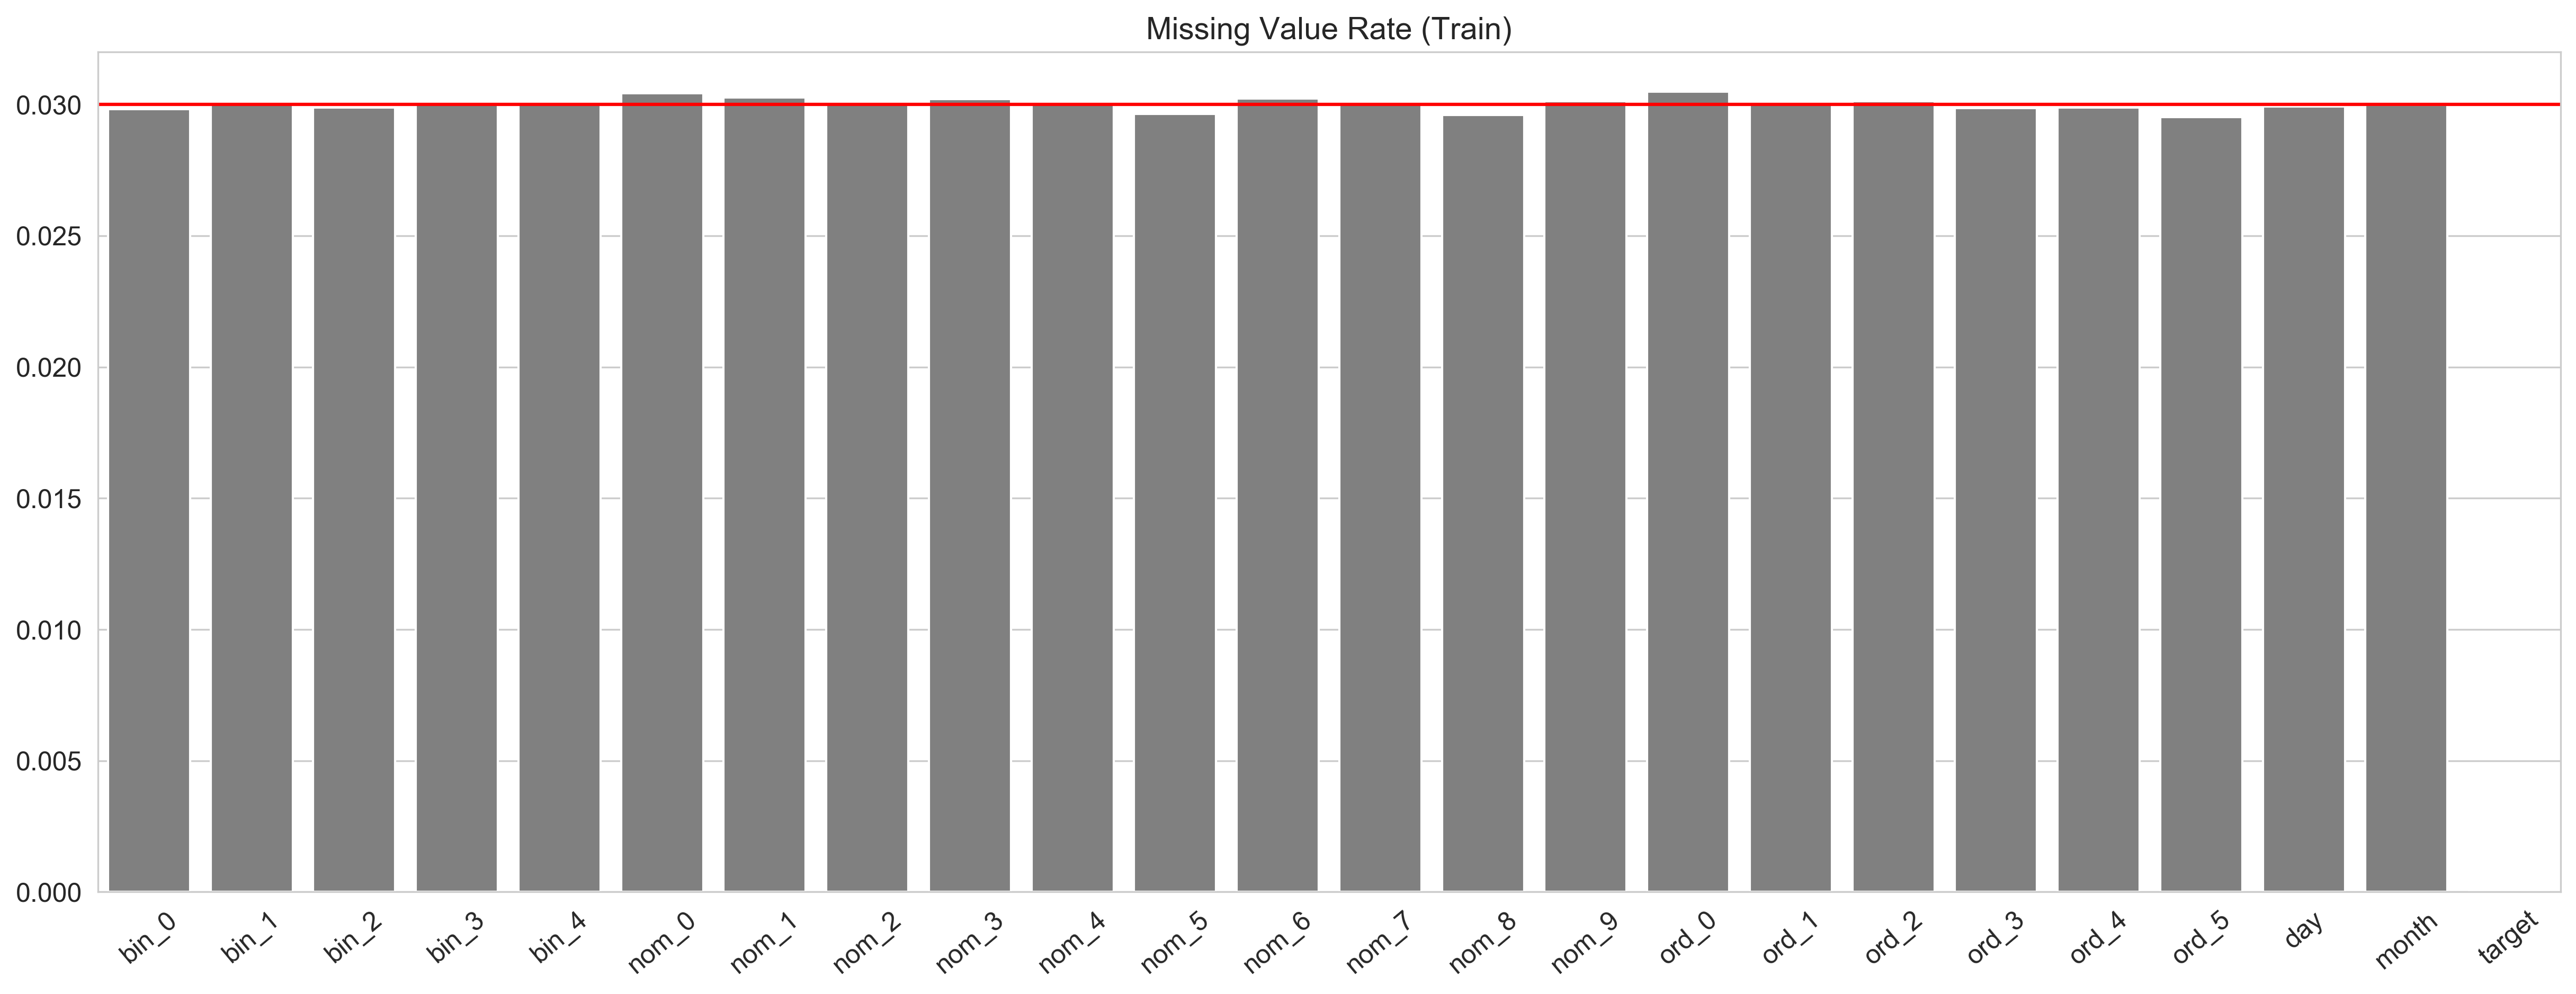

In [9]:
null_rate = [train[i].isna().sum() / len(train) for i in train.columns]
fig, ax = plt.subplots(1,1,figsize=(20, 7))
sns.barplot(x=train.columns, y=null_rate, ax=ax,color='gray')
ax.set_title("Missing Value Rate (Train)")
ax.set_xticklabels(train.columns, rotation=40)
ax.axhline(y=0.03, color='red')
plt.show()

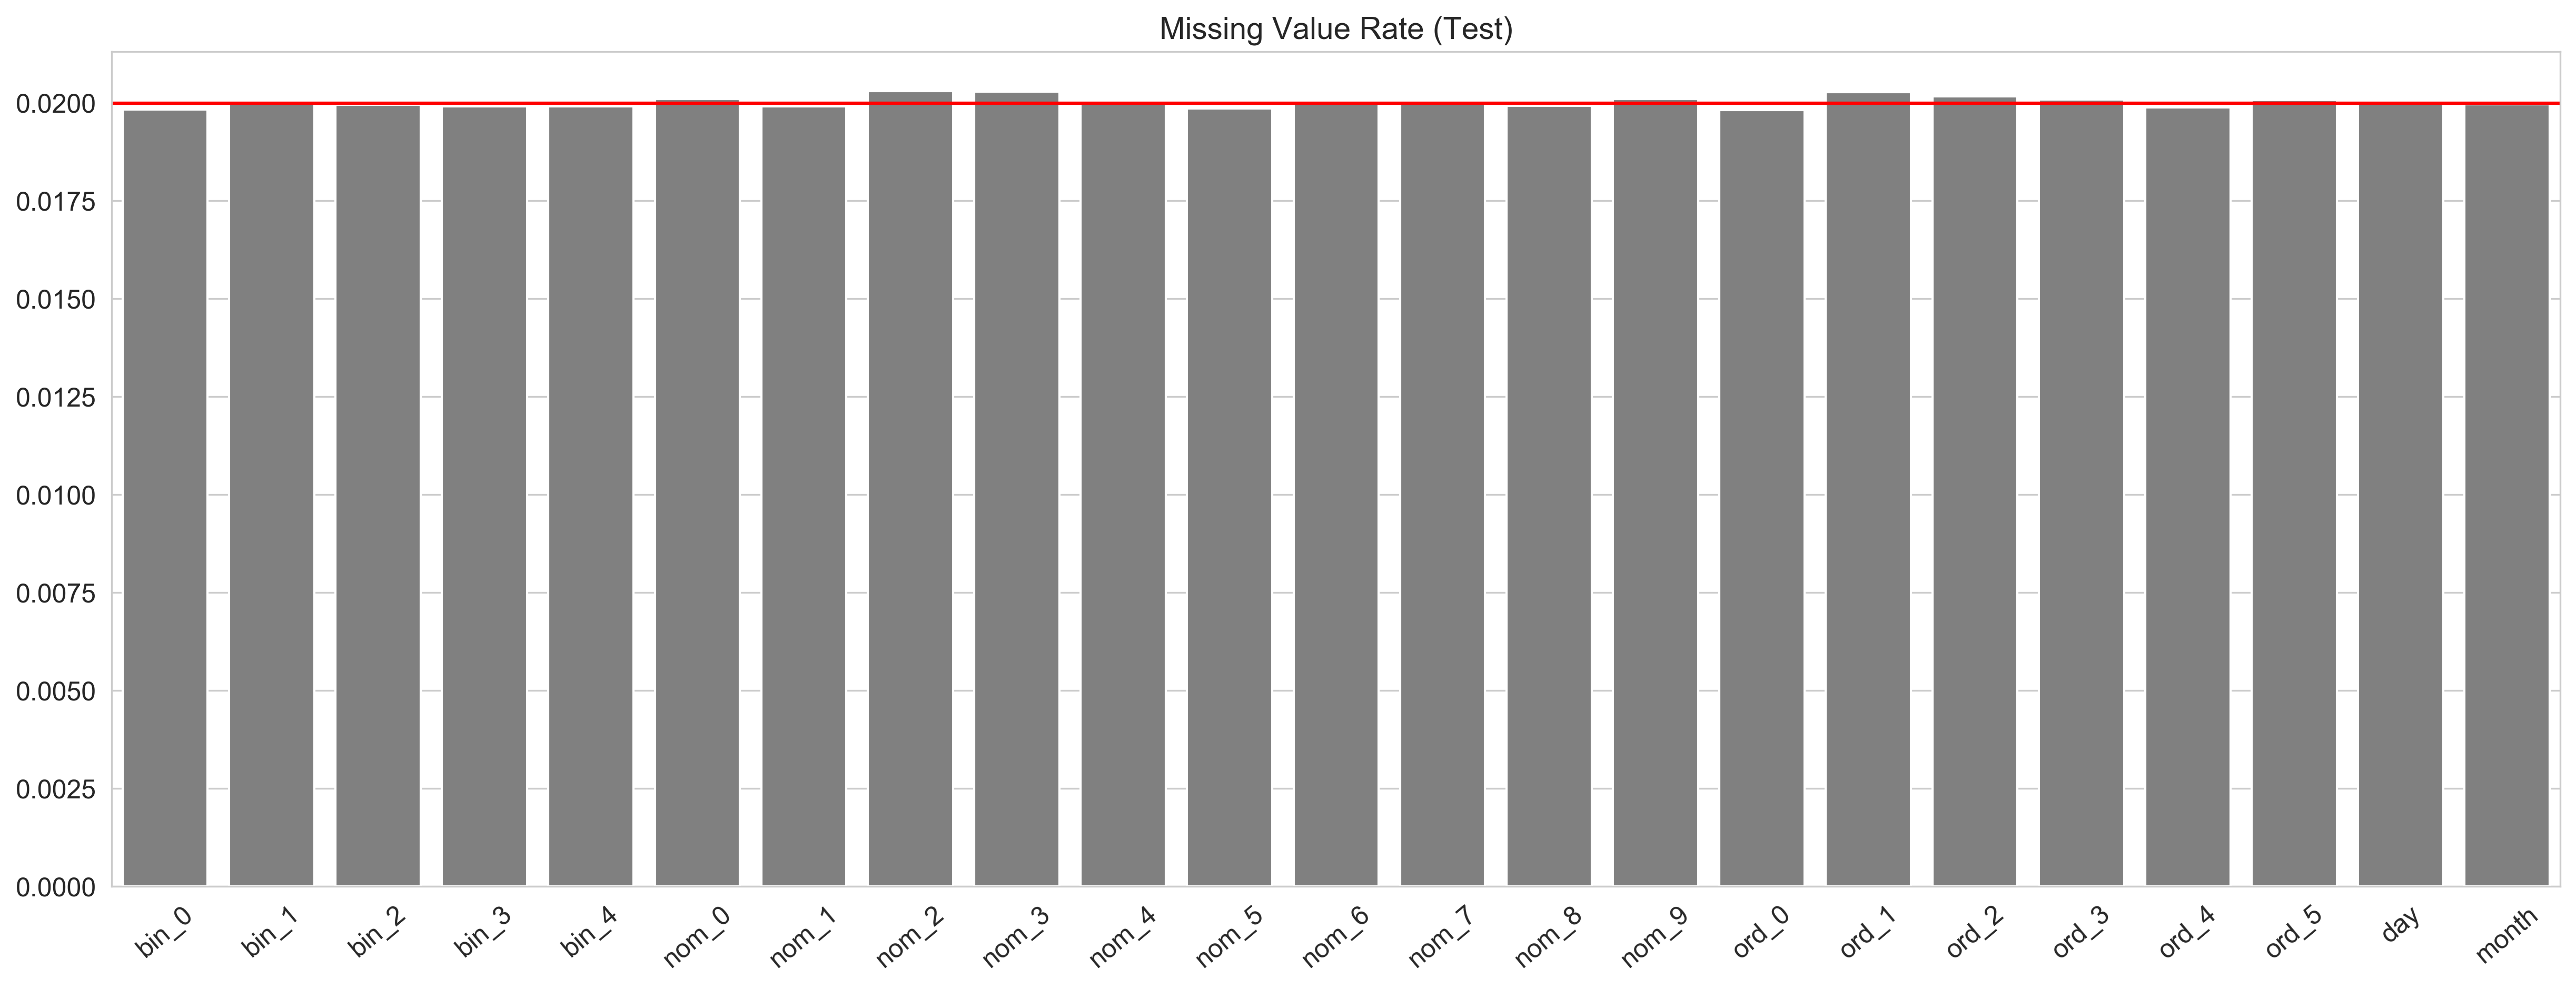

In [10]:
null_rate = [test[i].isna().sum() / len(train) for i in test.columns]
fig, ax = plt.subplots(1,1,figsize=(20, 7))
sns.barplot(x=test.columns, y=null_rate, ax=ax,color='gray')
ax.set_title("Missing Value Rate (Test)")
ax.set_xticklabels(test.columns, rotation=40)
ax.axhline(y=0.02, color='red')
plt.show()

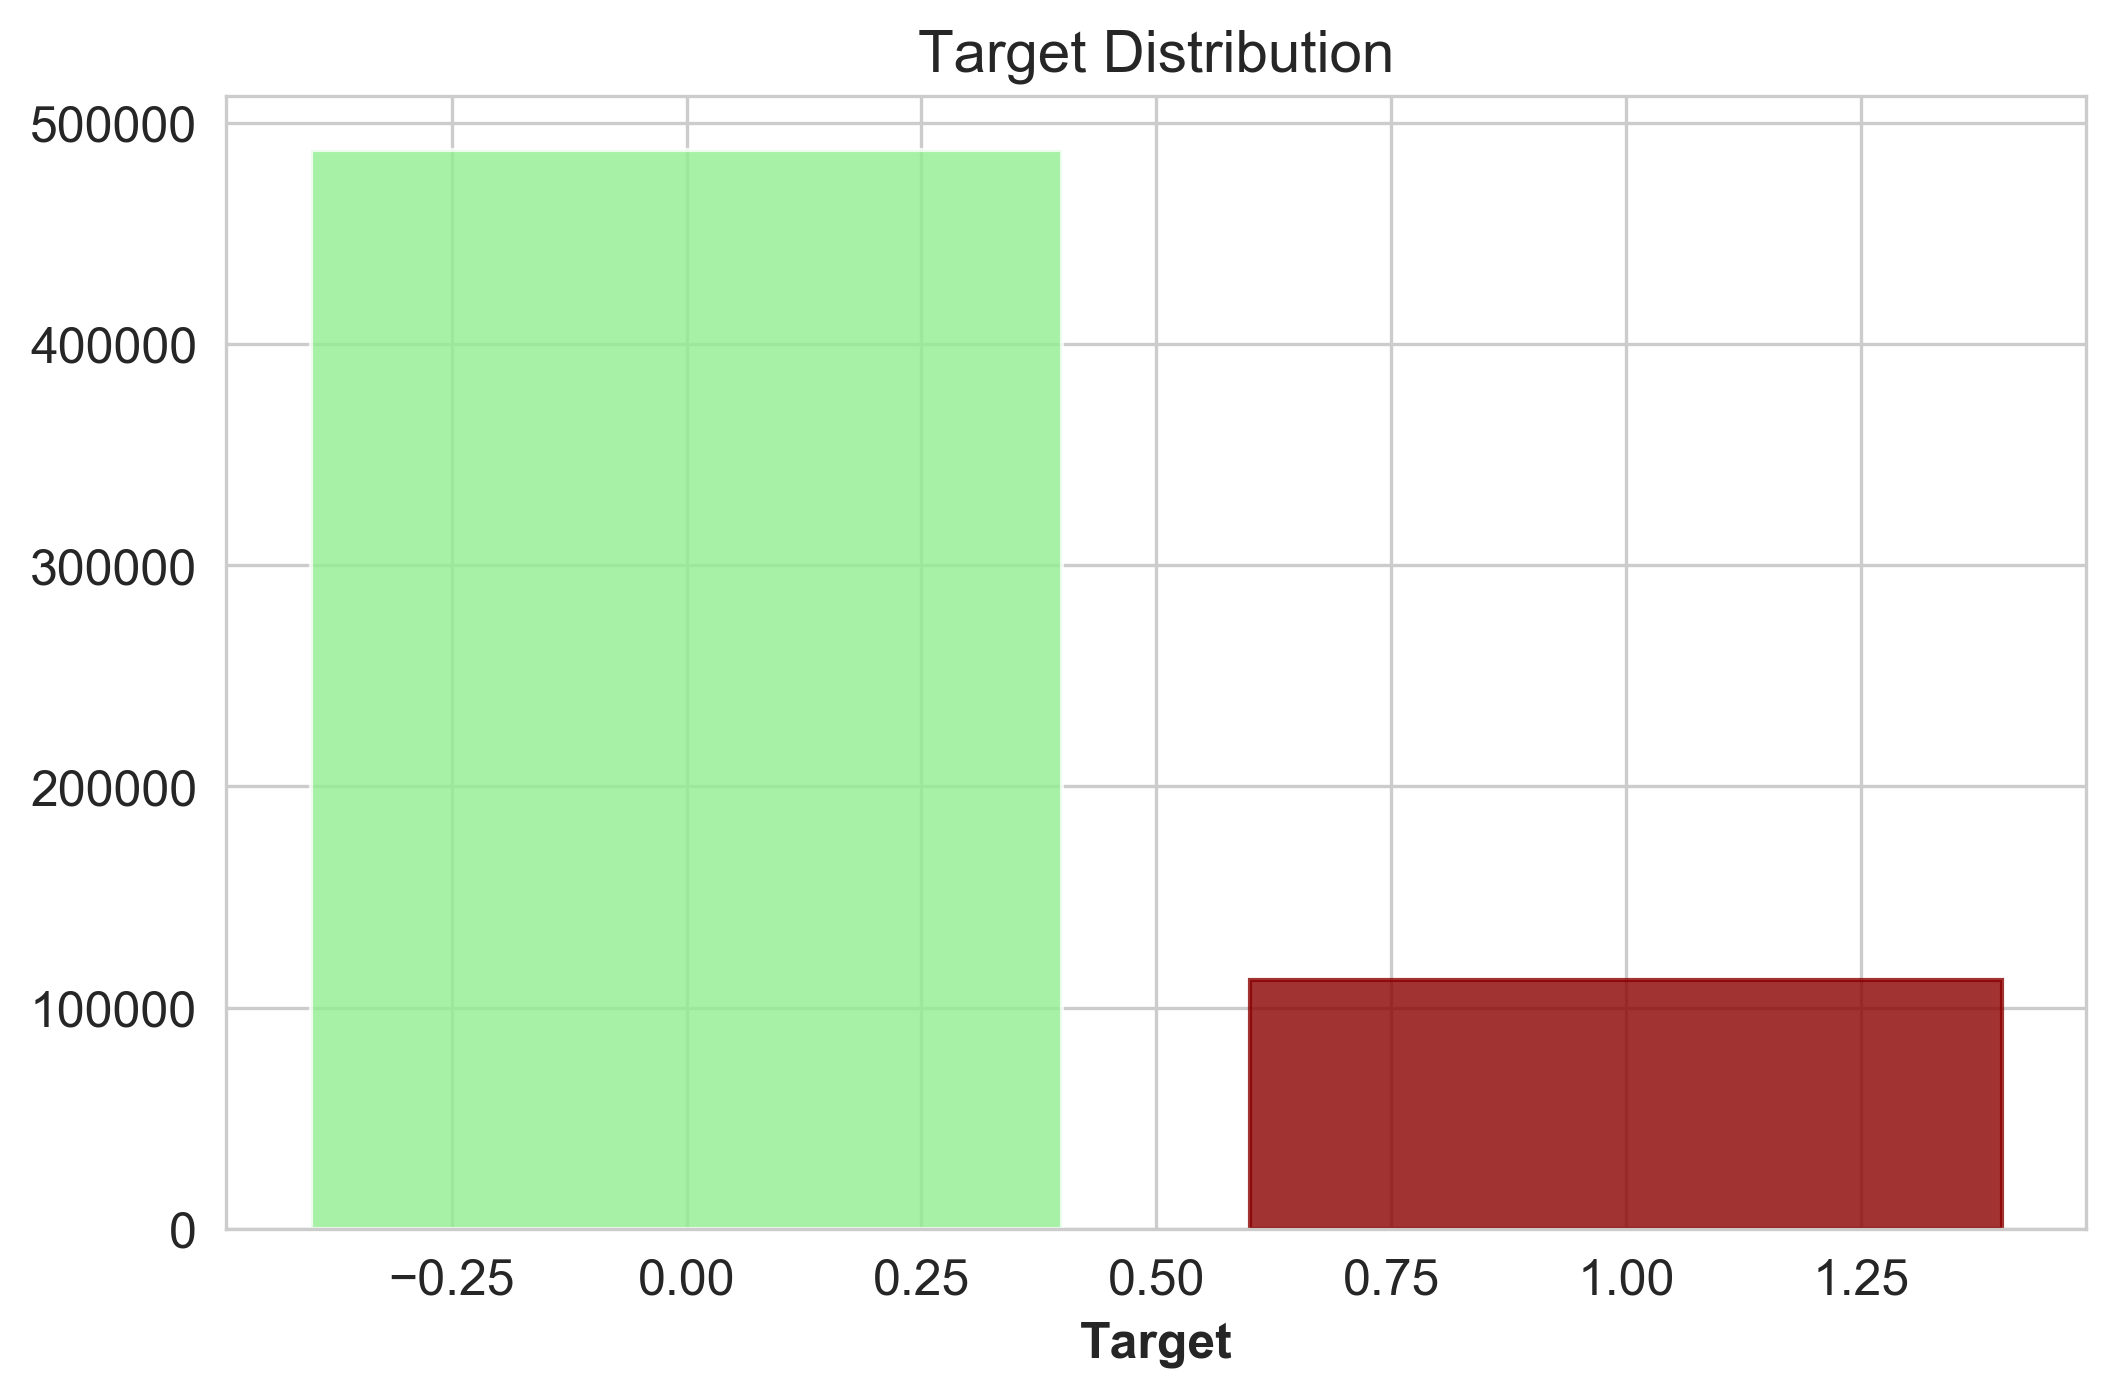

In [12]:
# 统计特征数量
target_dist = target.value_counts()

fig, ax = plt.subplots(1, 1, figsize=(8,5))

barplot = plt.bar(target_dist.index, target_dist, color = 'lightgreen', alpha = 0.8)
barplot[1].set_color('darkred')

# 标题
ax.set_title('Target Distribution')
# 绘制图片注释，以及设定样式和位置
ax.annotate("percentage of target 1 : {}%".format(target.sum() / len(target)),
              xy=(0, 0),xycoords='axes fraction', 
              xytext=(0,-50), textcoords='offset points',
              va="top", ha="left", color='grey',
              bbox=dict(boxstyle='round', fc="w", ec='w'))

plt.xlabel('Target', fontsize = 12, weight = 'bold')
plt.show()

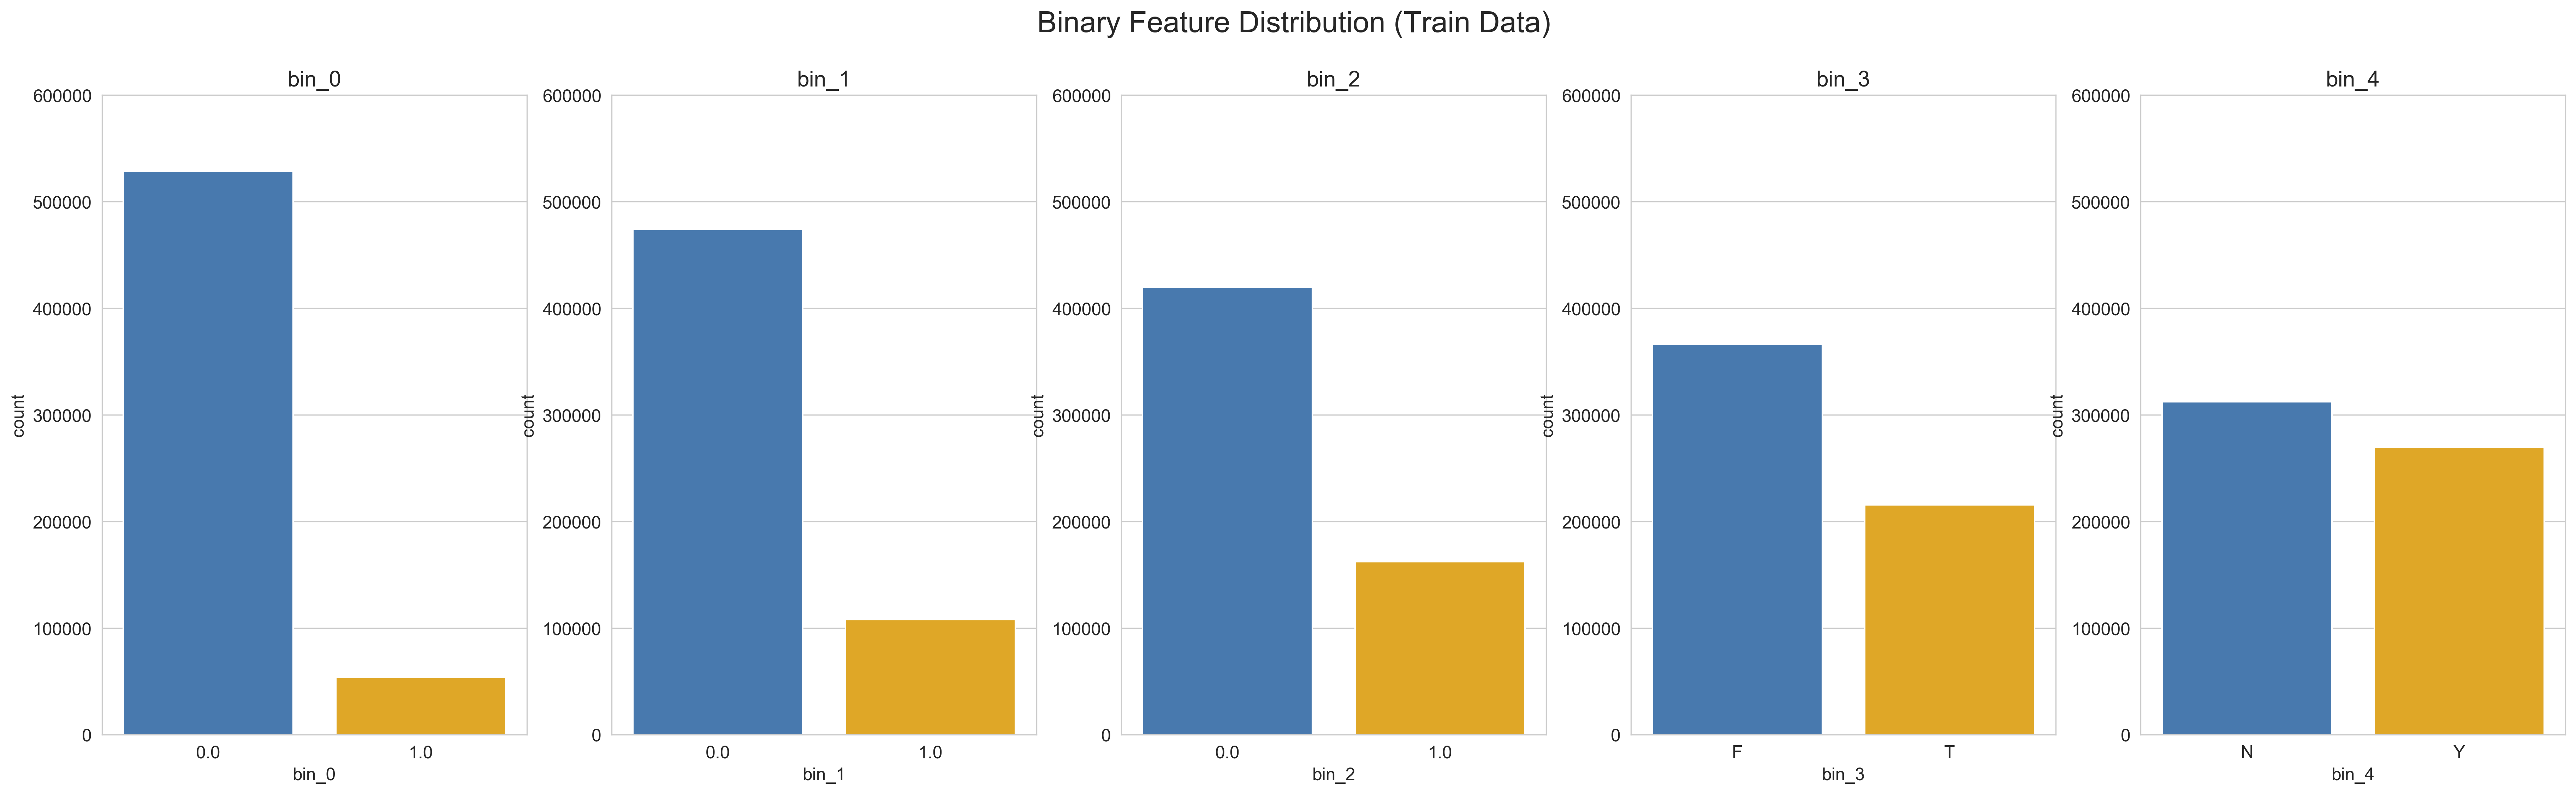

In [13]:
# Binary Feature

fig, ax = plt.subplots(1,5, figsize=(30, 8))
for i in range(5): 
    # 注意这里筛选了特征名称
    sns.countplot(f'bin_{i}', data= train, ax=ax[i])
    ax[i].set_ylim([0, 600000])  # 特征范围
    ax[i].set_title(f'bin_{i}', fontsize=15)
fig.suptitle("Binary Feature Distribution (Train Data)", fontsize=20)
plt.show()

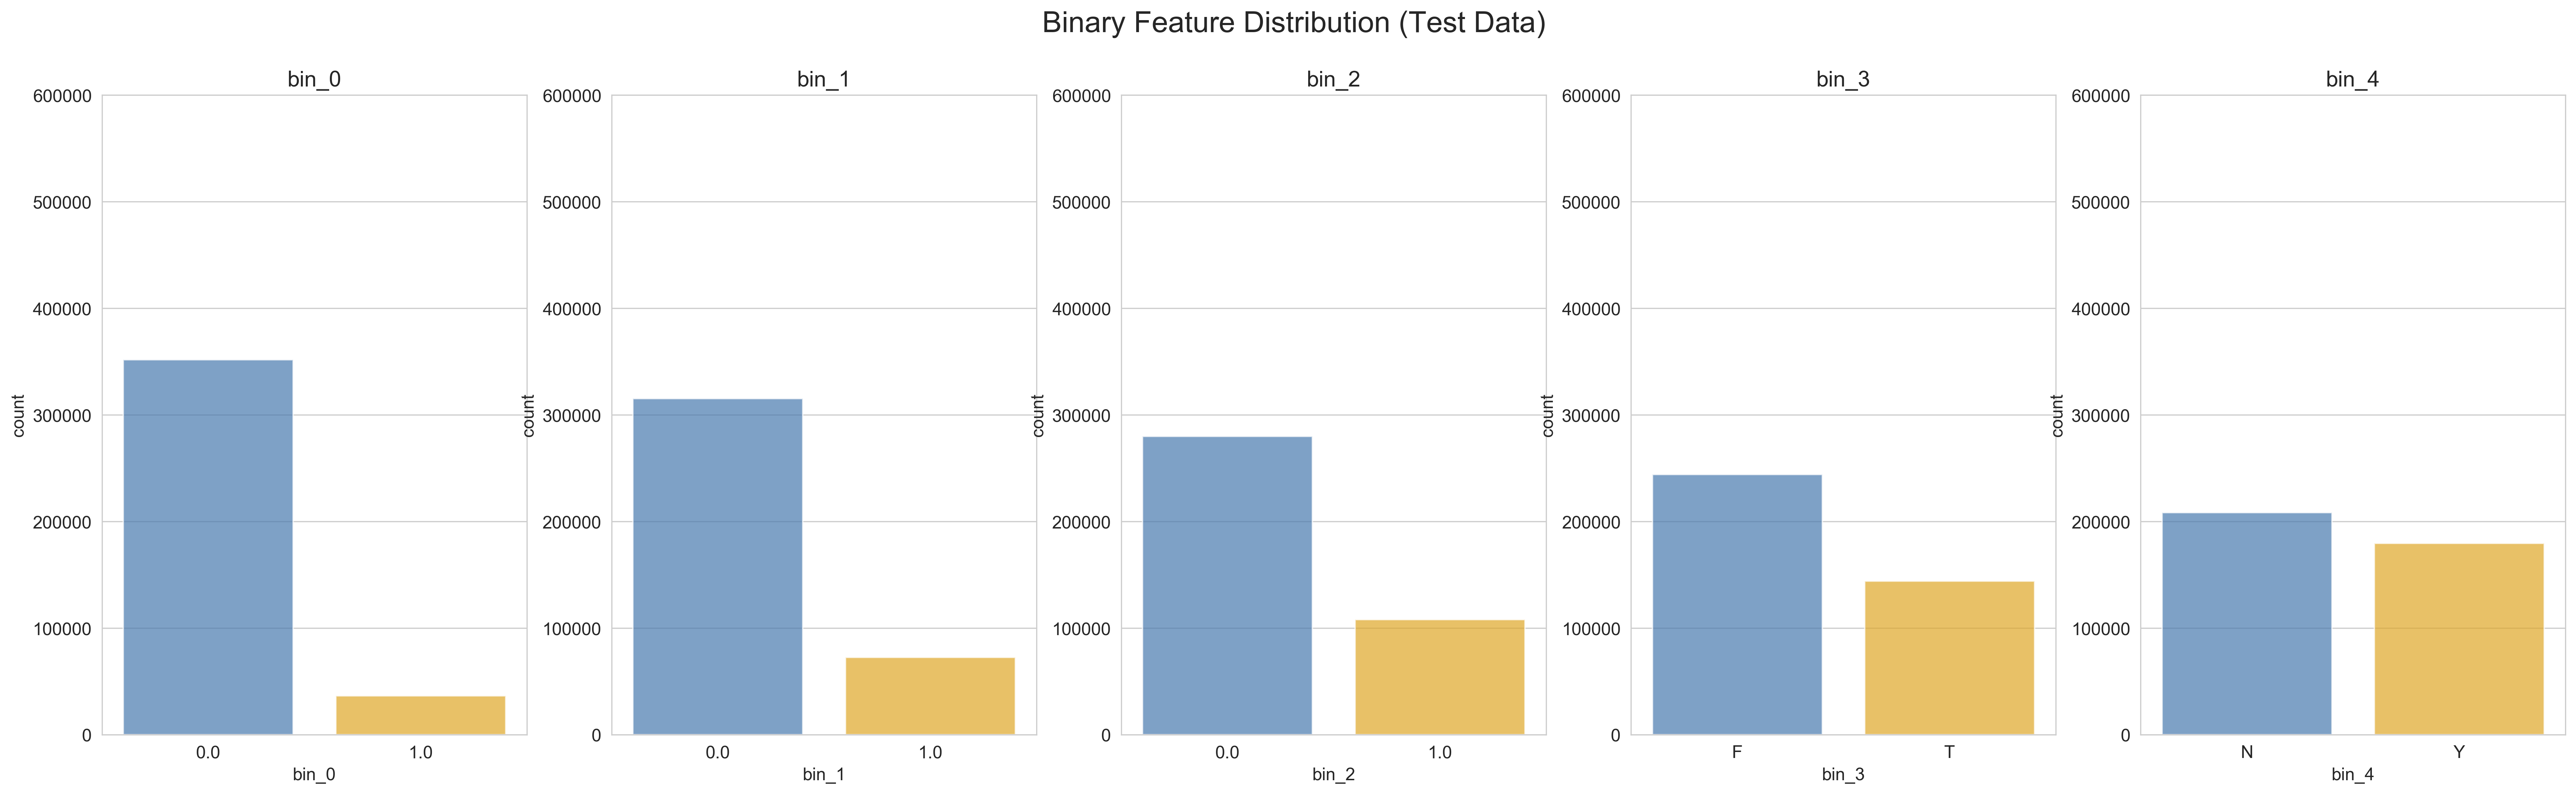

In [14]:
fig, ax = plt.subplots(1,5, figsize=(30, 8))
for i in range(5): 
    sns.countplot(f'bin_{i}', data= test, ax=ax[i], alpha=0.7,
                 order=test[f'bin_{i}'].value_counts().index)
    ax[i].set_ylim([0, 600000])
    ax[i].set_title(f'bin_{i}', fontsize=15)
fig.suptitle("Binary Feature Distribution (Test Data)", fontsize=20)
plt.show()

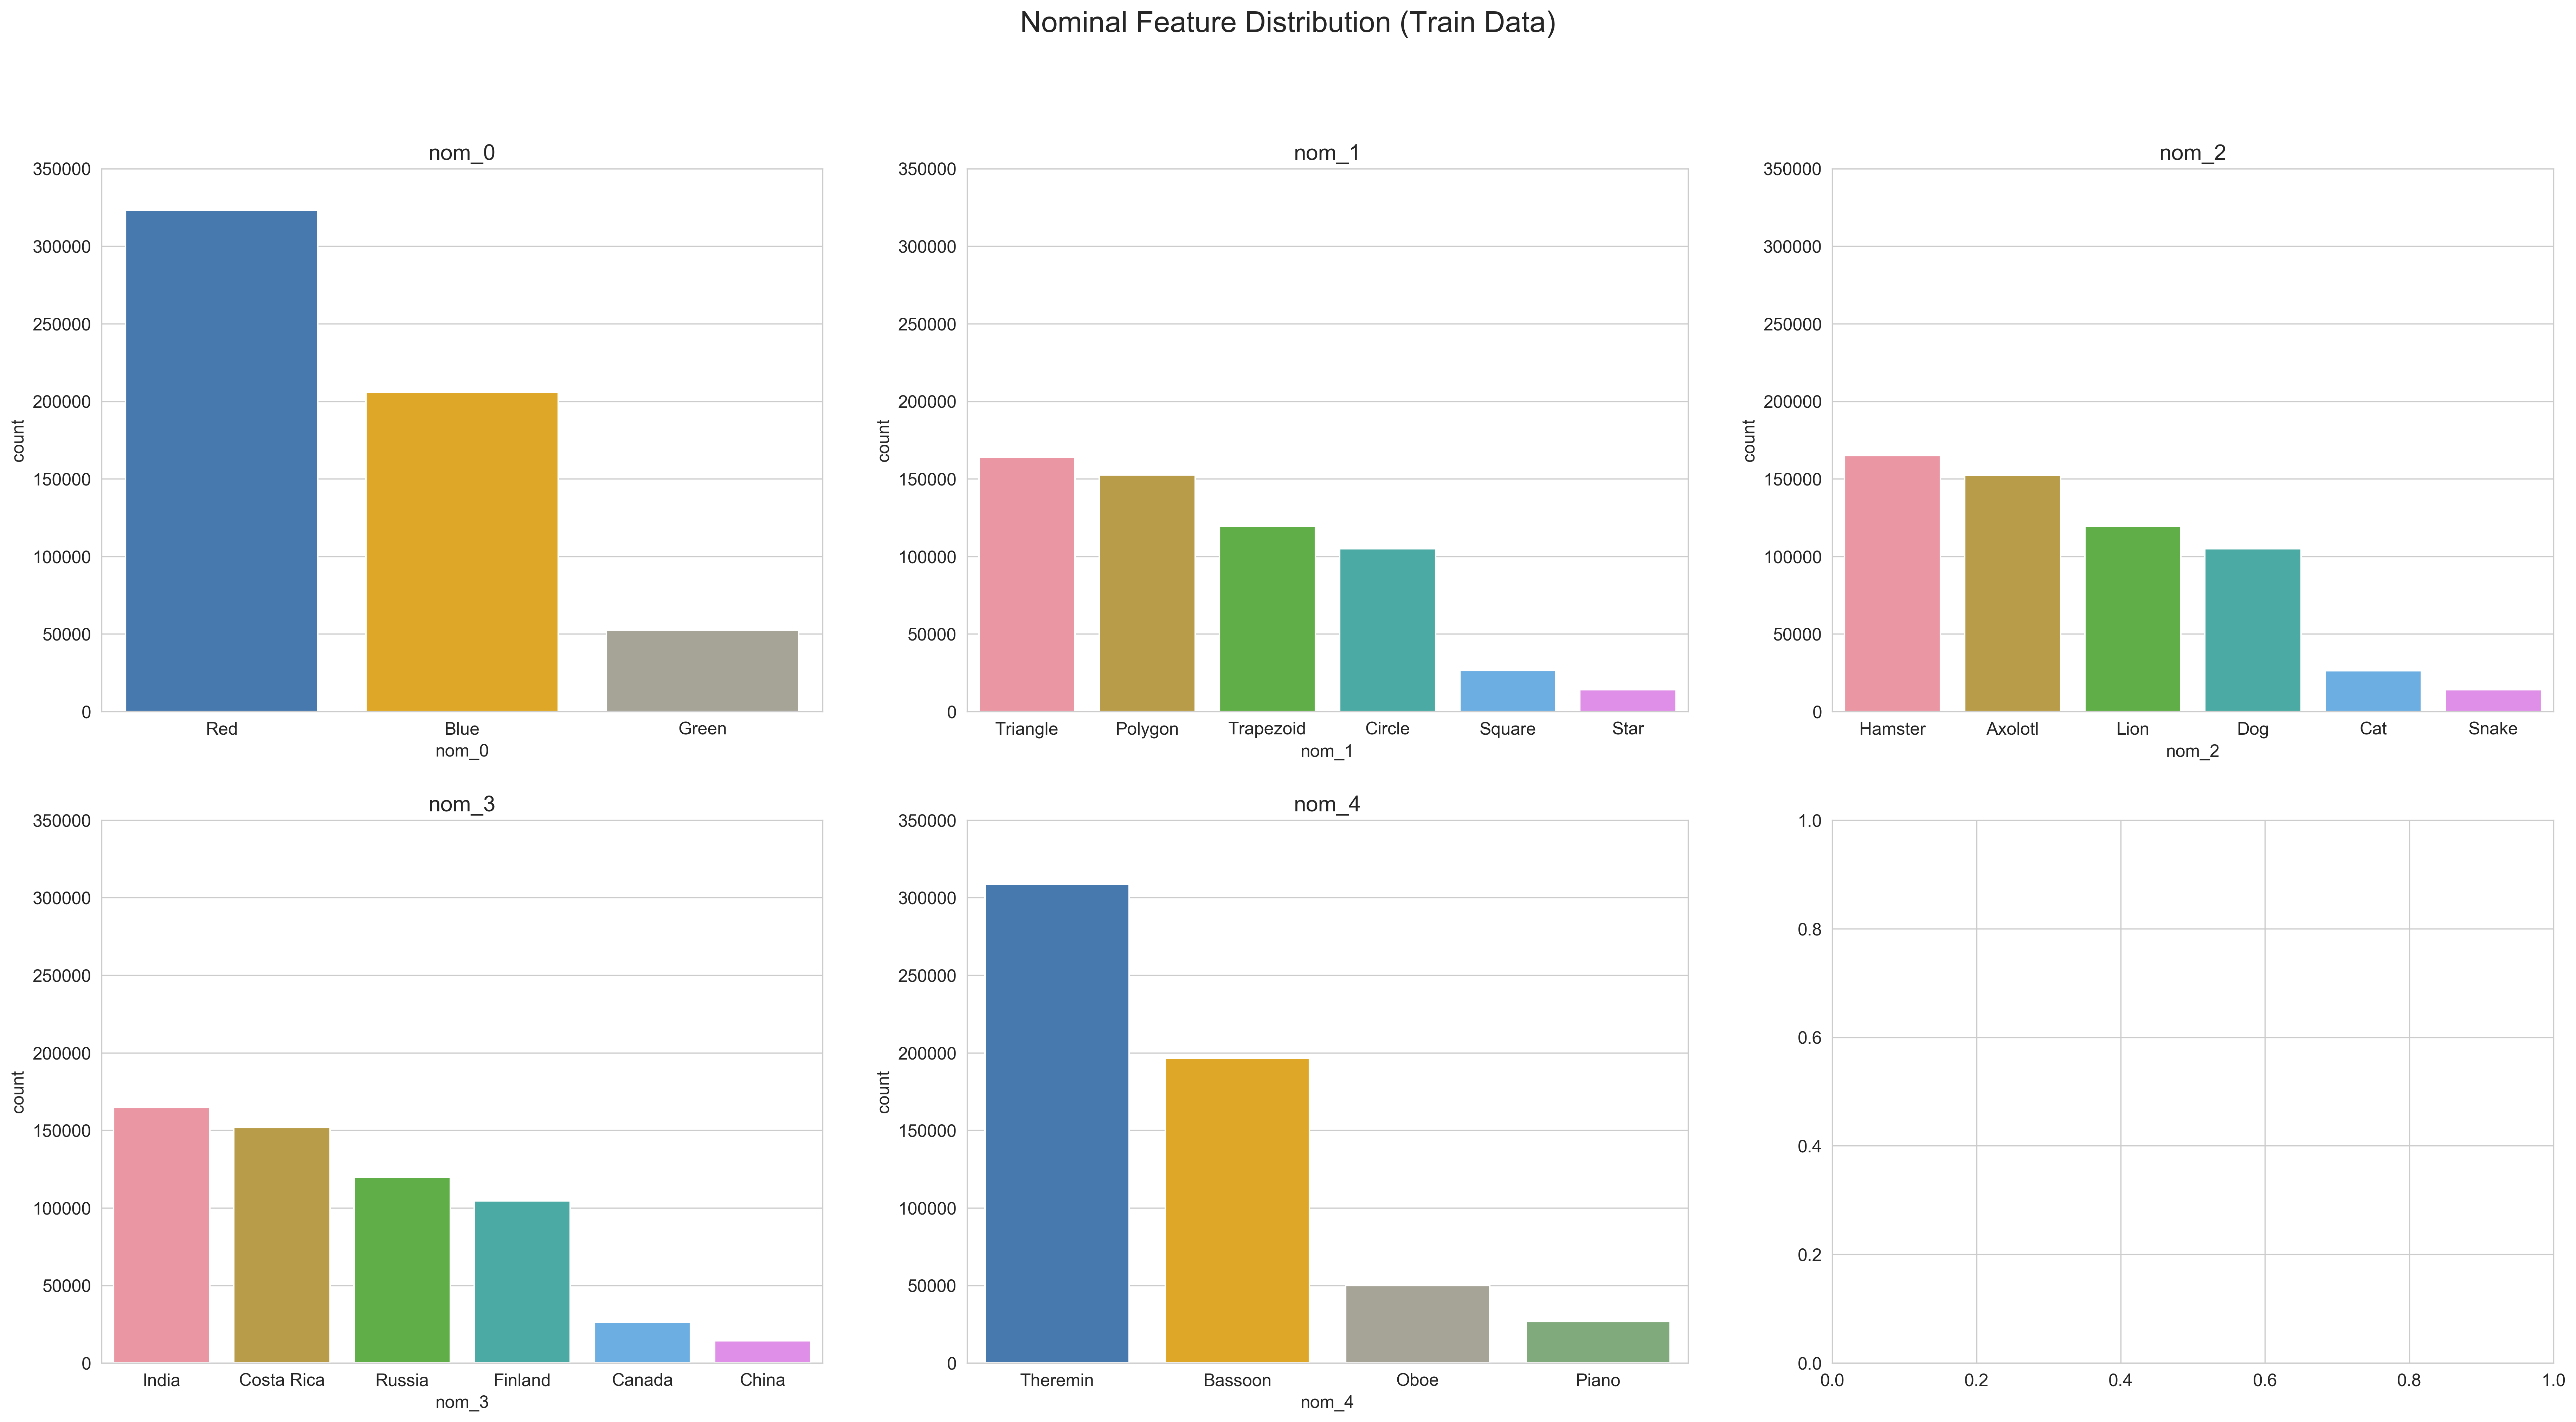

In [15]:
fig, ax = plt.subplots(2,3, figsize=(30, 15))
for i in range(5): 
    sns.countplot(f'nom_{i}', data= train, ax=ax[i//3][i%3],
                 order=train[f'nom_{i}'].value_counts().index)
    ax[i//3][i%3].set_ylim([0, 350000])
    ax[i//3][i%3].set_title(f'nom_{i}', fontsize=15)
fig.suptitle("Nominal Feature Distribution (Train Data)", fontsize=20)
plt.show()

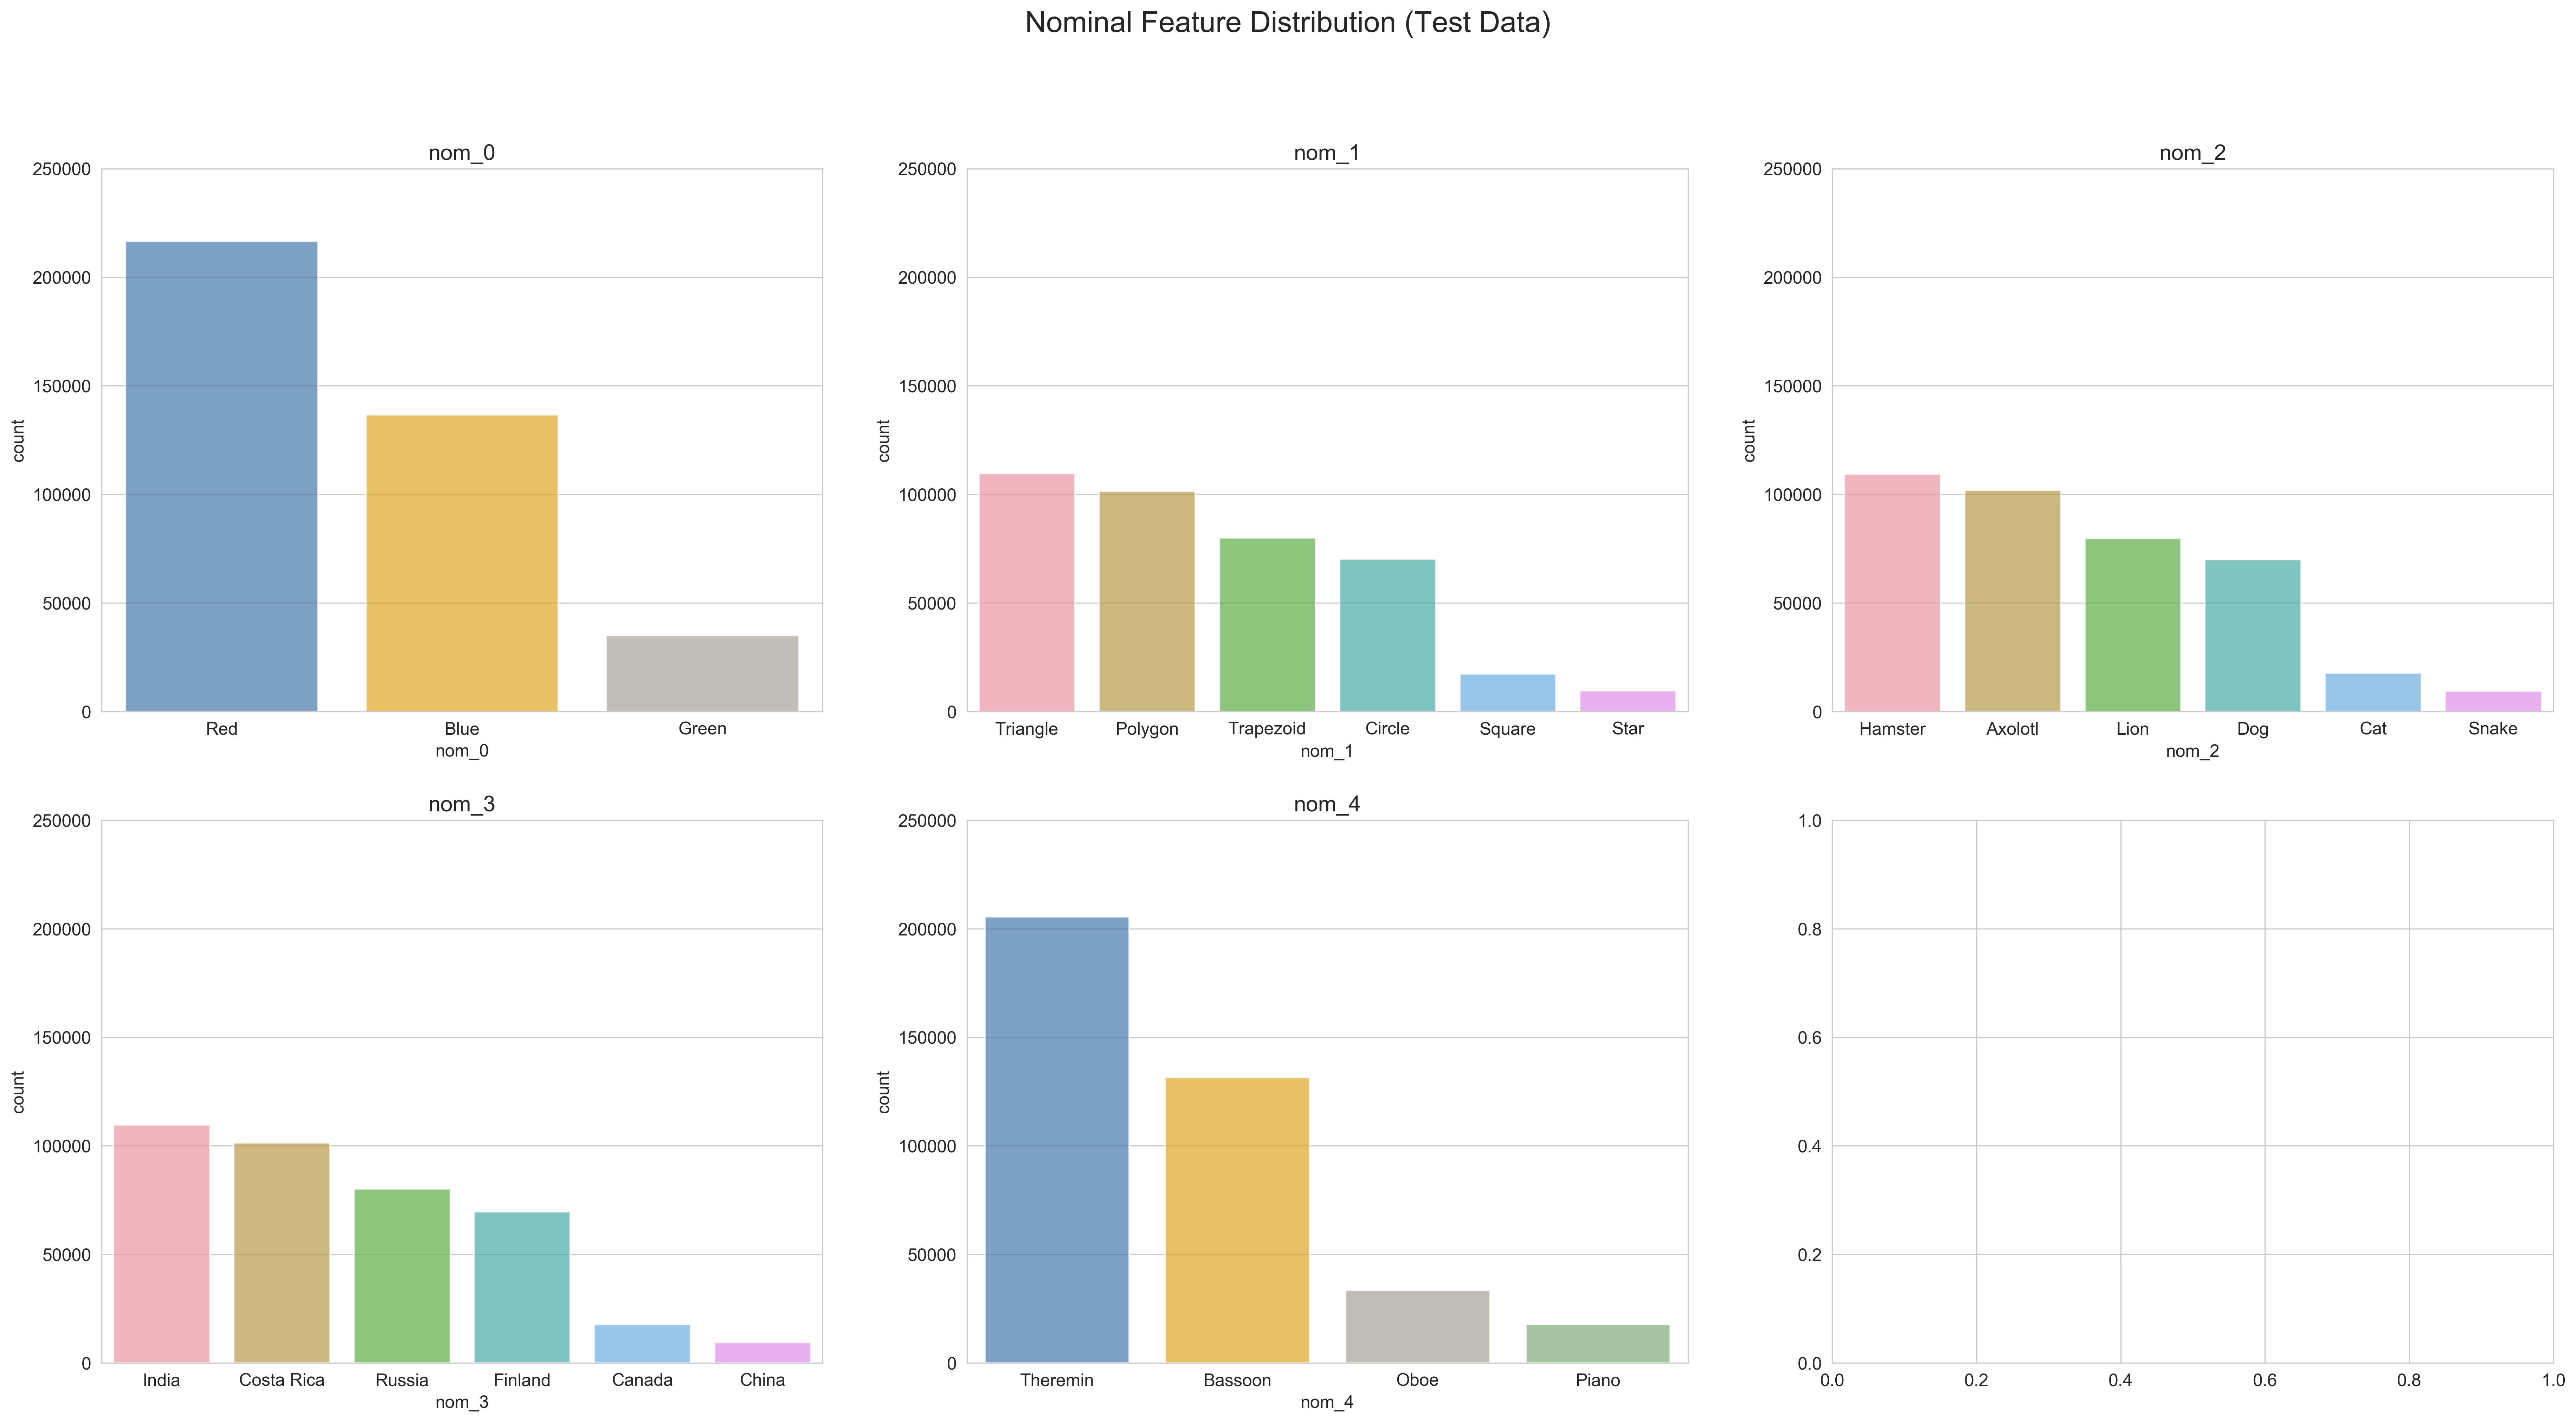

In [16]:
fig, ax = plt.subplots(2,3, figsize=(30, 15))
for i in range(5): 
    sns.countplot(f'nom_{i}', data= test, ax=ax[i//3][i%3],
                 order=test[f'nom_{i}'].value_counts().index,
                 alpha=0.7)  # 变淡？
    ax[i//3][i%3].set_ylim([0, 250000])
    ax[i//3][i%3].set_title(f'nom_{i}', fontsize=15)
fig.suptitle("Nominal Feature Distribution (Test Data)", fontsize=20)
plt.show()

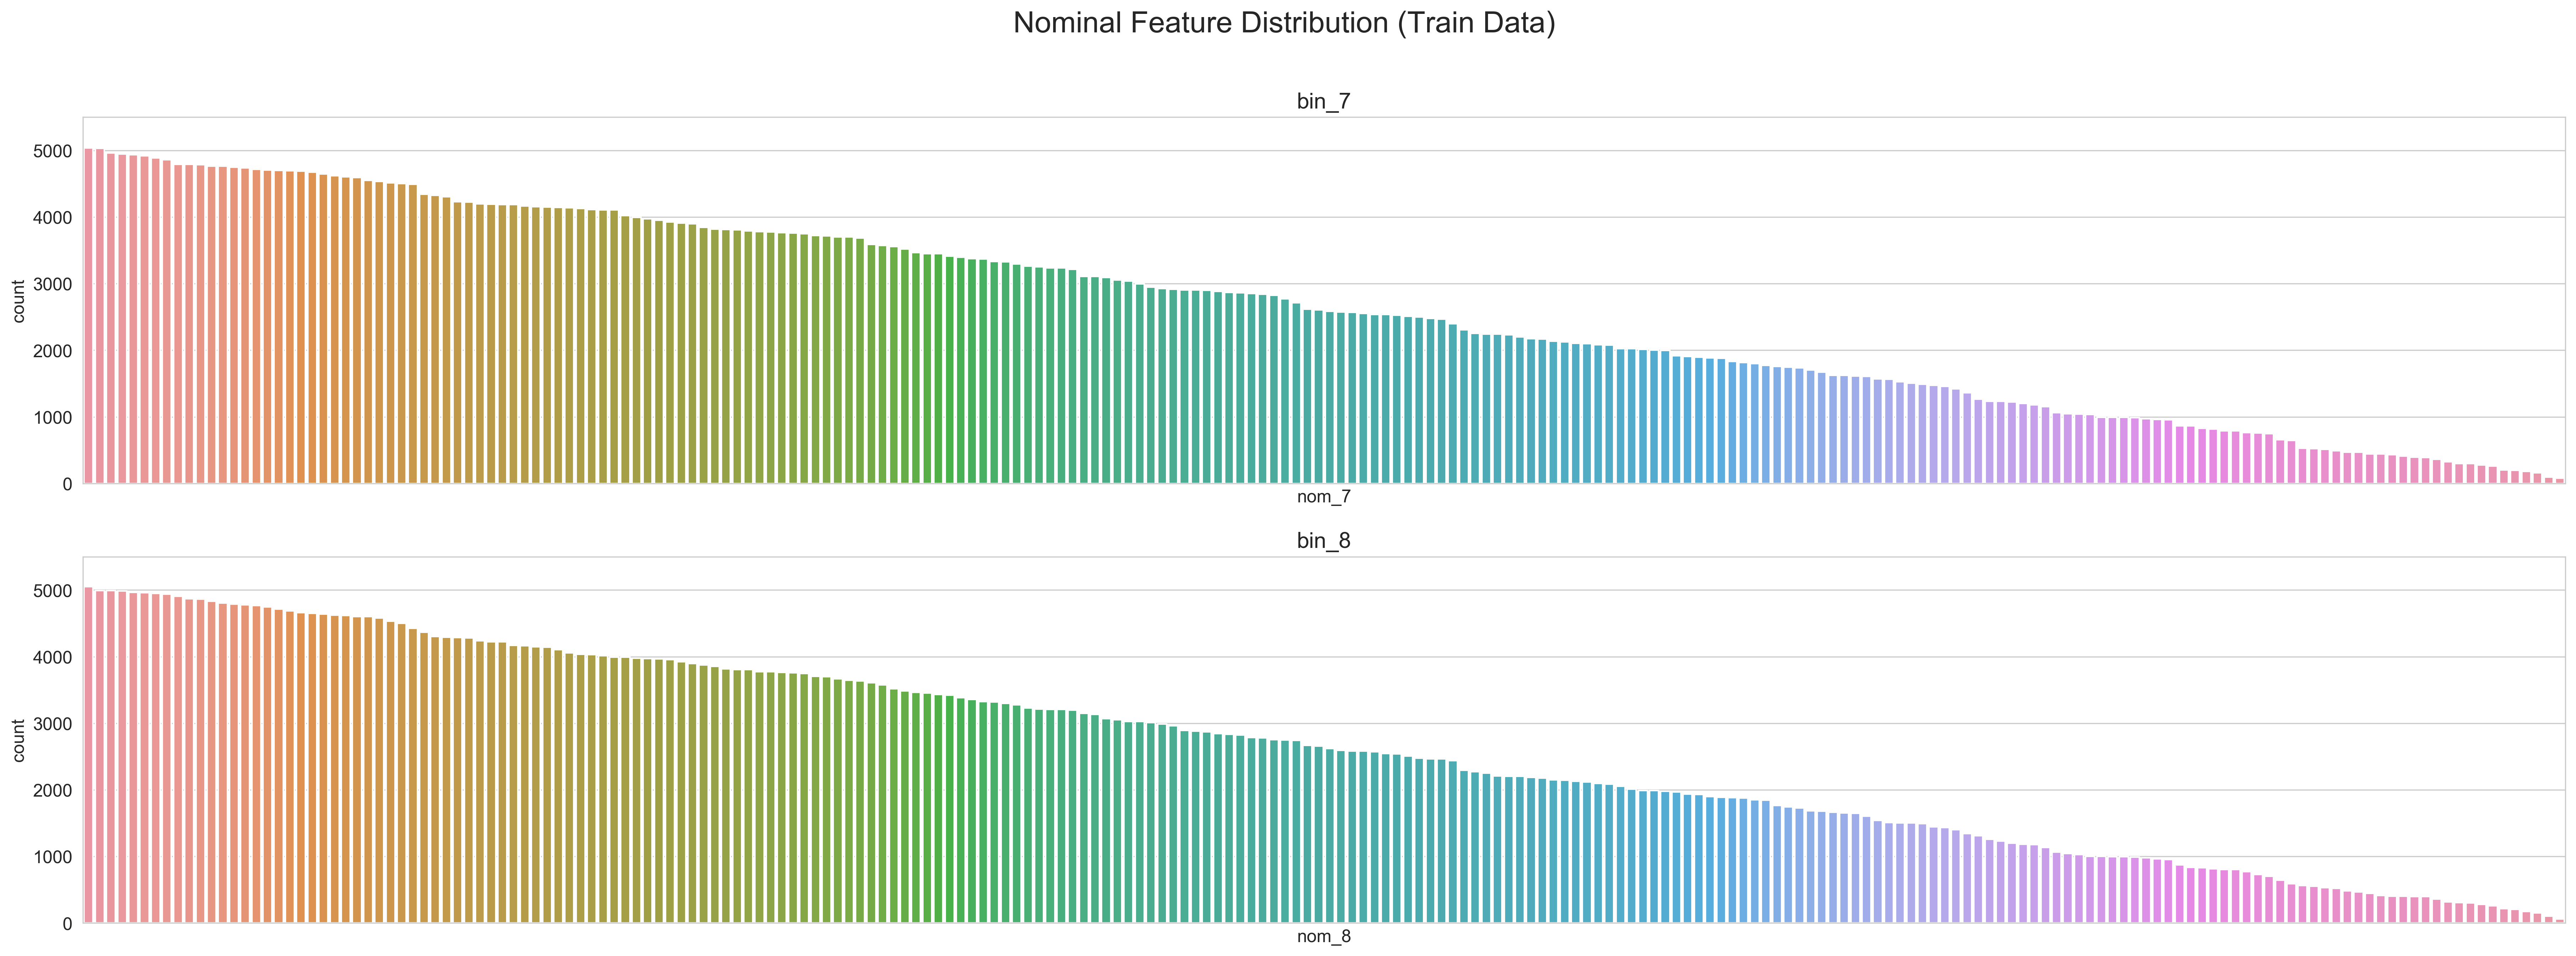

In [17]:
fig, ax = plt.subplots(2,1, figsize=(30, 10))
for i in range(7,9): 
    sns.countplot(f'nom_{i}', data= train, ax=ax[i-7],
                  order = train[f'nom_{i}'].dropna().value_counts().index)
    ax[i-7].set_ylim([0, 5500])
    ax[i-7].set_title(f'bin_{i}', fontsize=15)
    ax[i-7].set_xticks([])
fig.suptitle("Nominal Feature Distribution (Train Data)", fontsize=20)
plt.show()

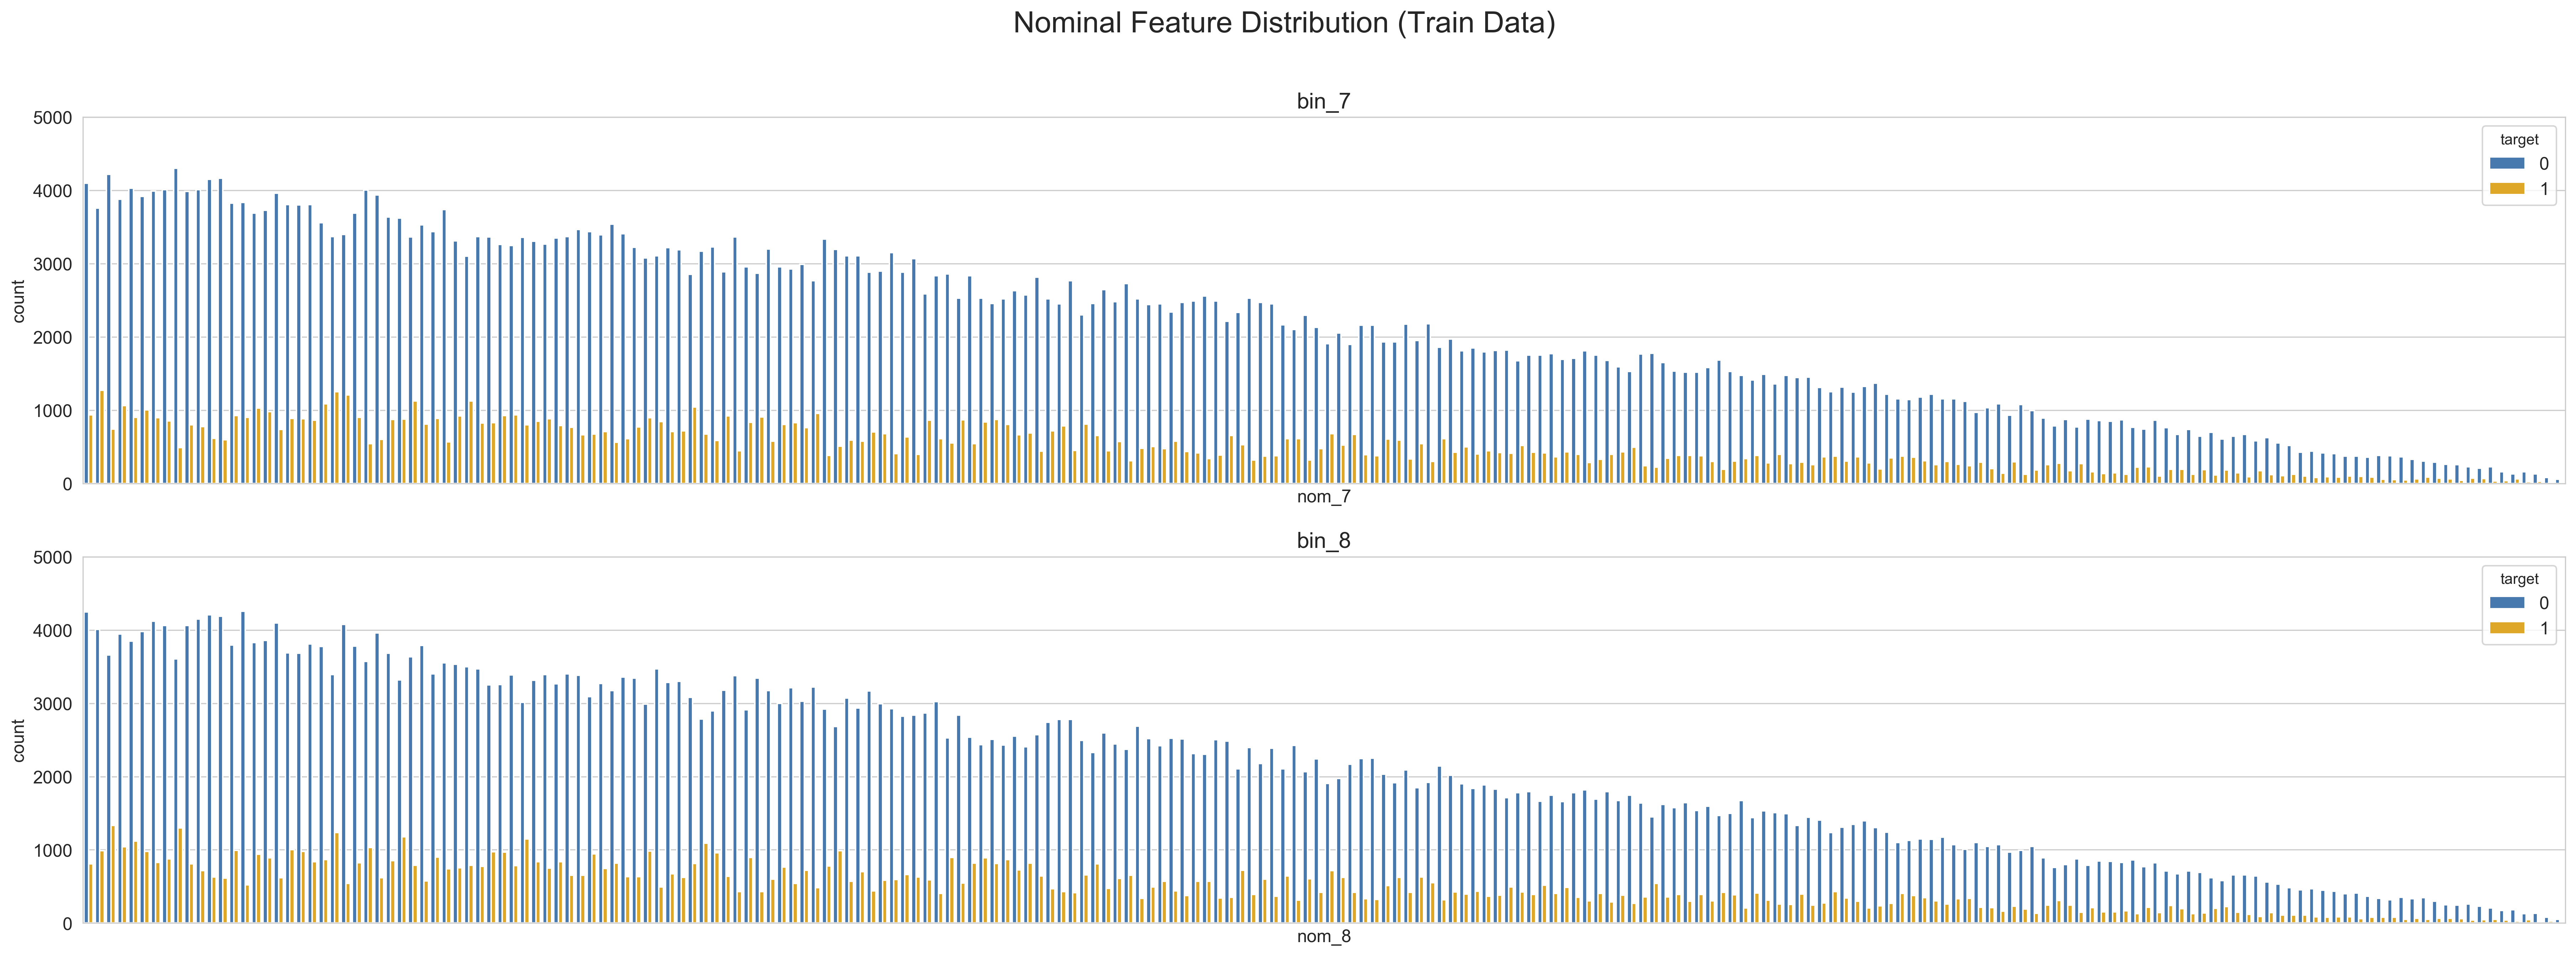

In [18]:
fig, ax = plt.subplots(2,1, figsize=(30, 10))
for i in range(7,9): 
    sns.countplot(f'nom_{i}', hue='target', data= train, ax=ax[i-7],
                  order = train[f'nom_{i}'].dropna().value_counts().index)
    ax[i-7].set_ylim([0, 5000])
    ax[i-7].set_title(f'bin_{i}', fontsize=15)
    ax[i-7].set_xticks([])
fig.suptitle("Nominal Feature Distribution (Train Data)", fontsize=20)
plt.show()

In [19]:
# 序列类特征

train[[f'ord_{i}' for i in range(6)]].describe(include='all')

,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5
count,581712.000000,581959,581925,582084,582070,582287
unique,NaN,5,6,15,26,190
top,NaN,Novice,Freezing,n,N,Fl
freq,NaN,160597,142726,70982,39978,10562
mean,1.948224,NaN,NaN,NaN,NaN,NaN
std,0.853904,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN
25%,1.000000,NaN,NaN,NaN,NaN,NaN
50%,2.000000,NaN,NaN,NaN,NaN,NaN
75%,3.000000,NaN,NaN,NaN,NaN,NaN


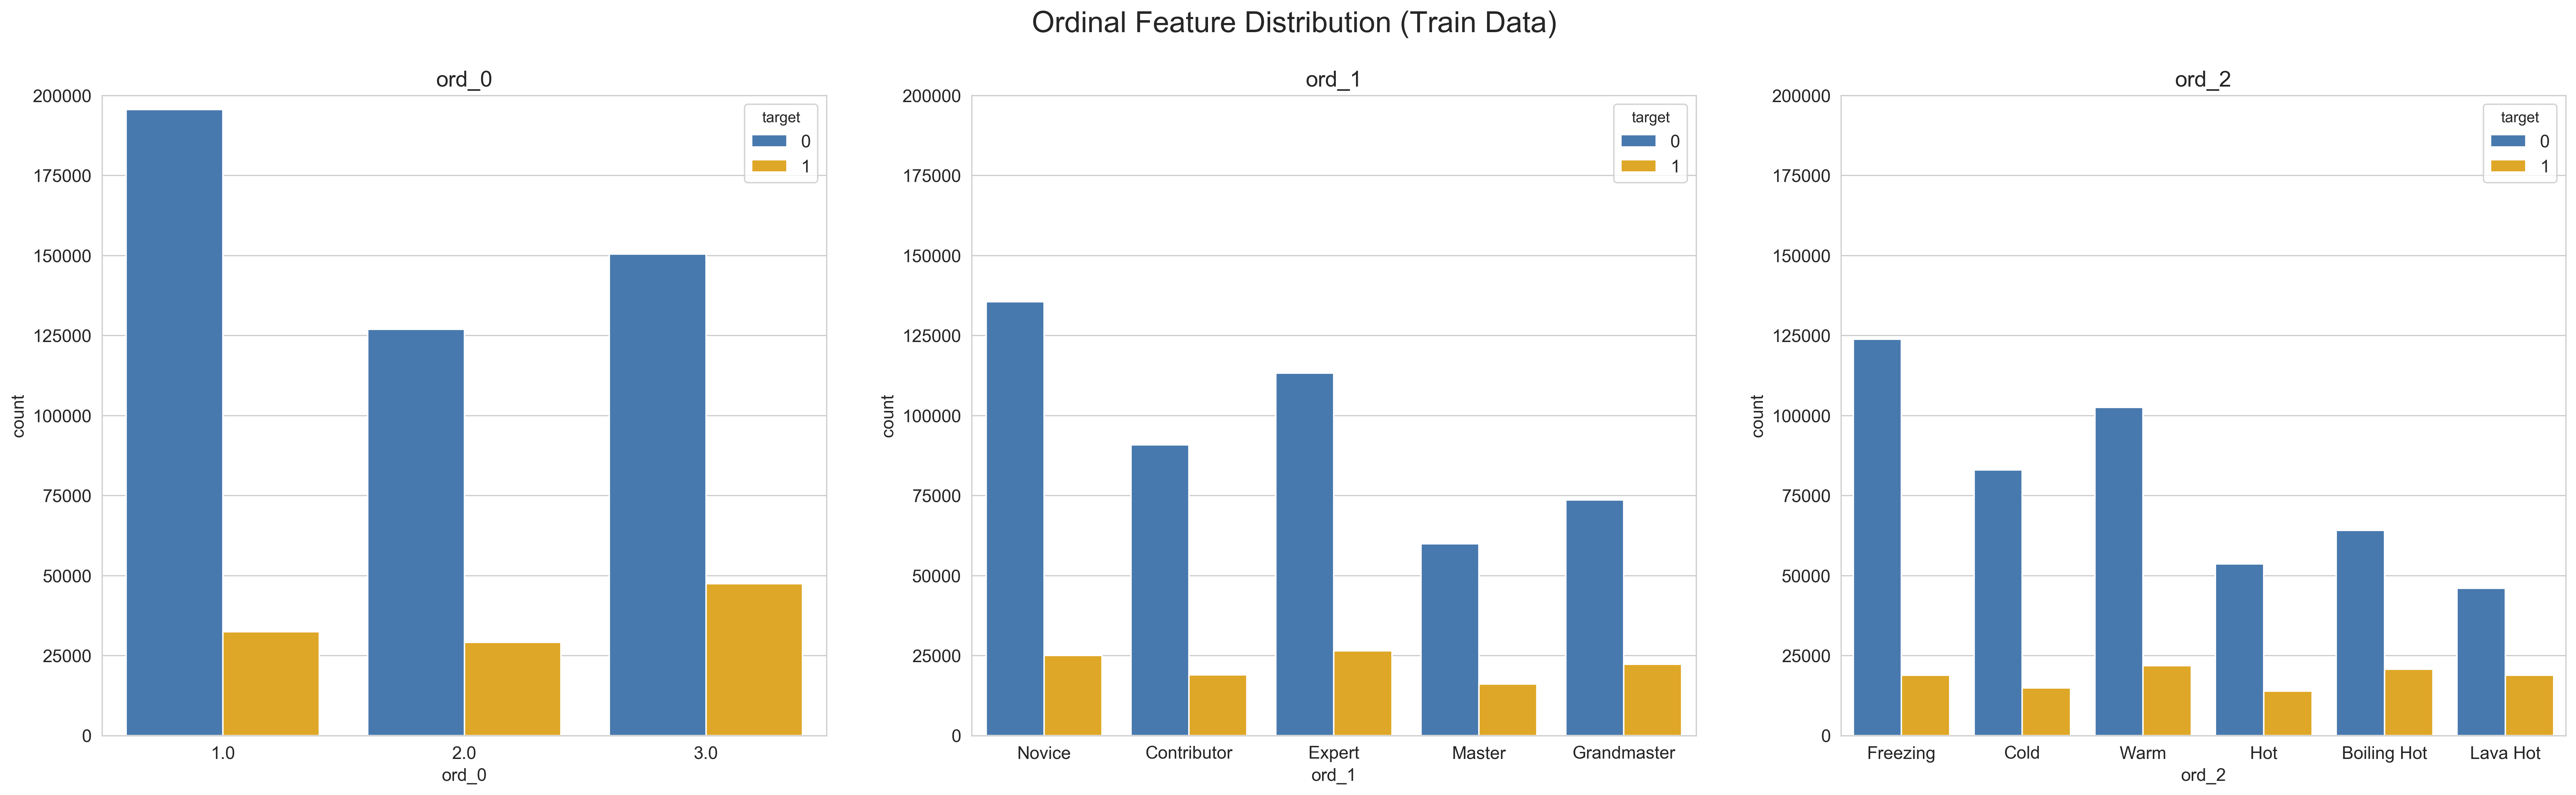

In [20]:
fig, ax = plt.subplots(1,3, figsize=(30, 8))

ord_order = [
    [1.0, 2.0, 3.0],
    ['Novice', 'Contributor', 'Expert', 'Master', 'Grandmaster'],
    ['Freezing', 'Cold', 'Warm', 'Hot', 'Boiling Hot', 'Lava Hot']
]

for i in range(3): 
    sns.countplot(f'ord_{i}', hue='target', data= train, ax=ax[i],
                  order = ord_order[i]
                 )
    ax[i].set_ylim([0, 200000])
    ax[i].set_title(f'ord_{i}', fontsize=15)
fig.suptitle("Ordinal Feature Distribution (Train Data)", fontsize=20)
plt.show()

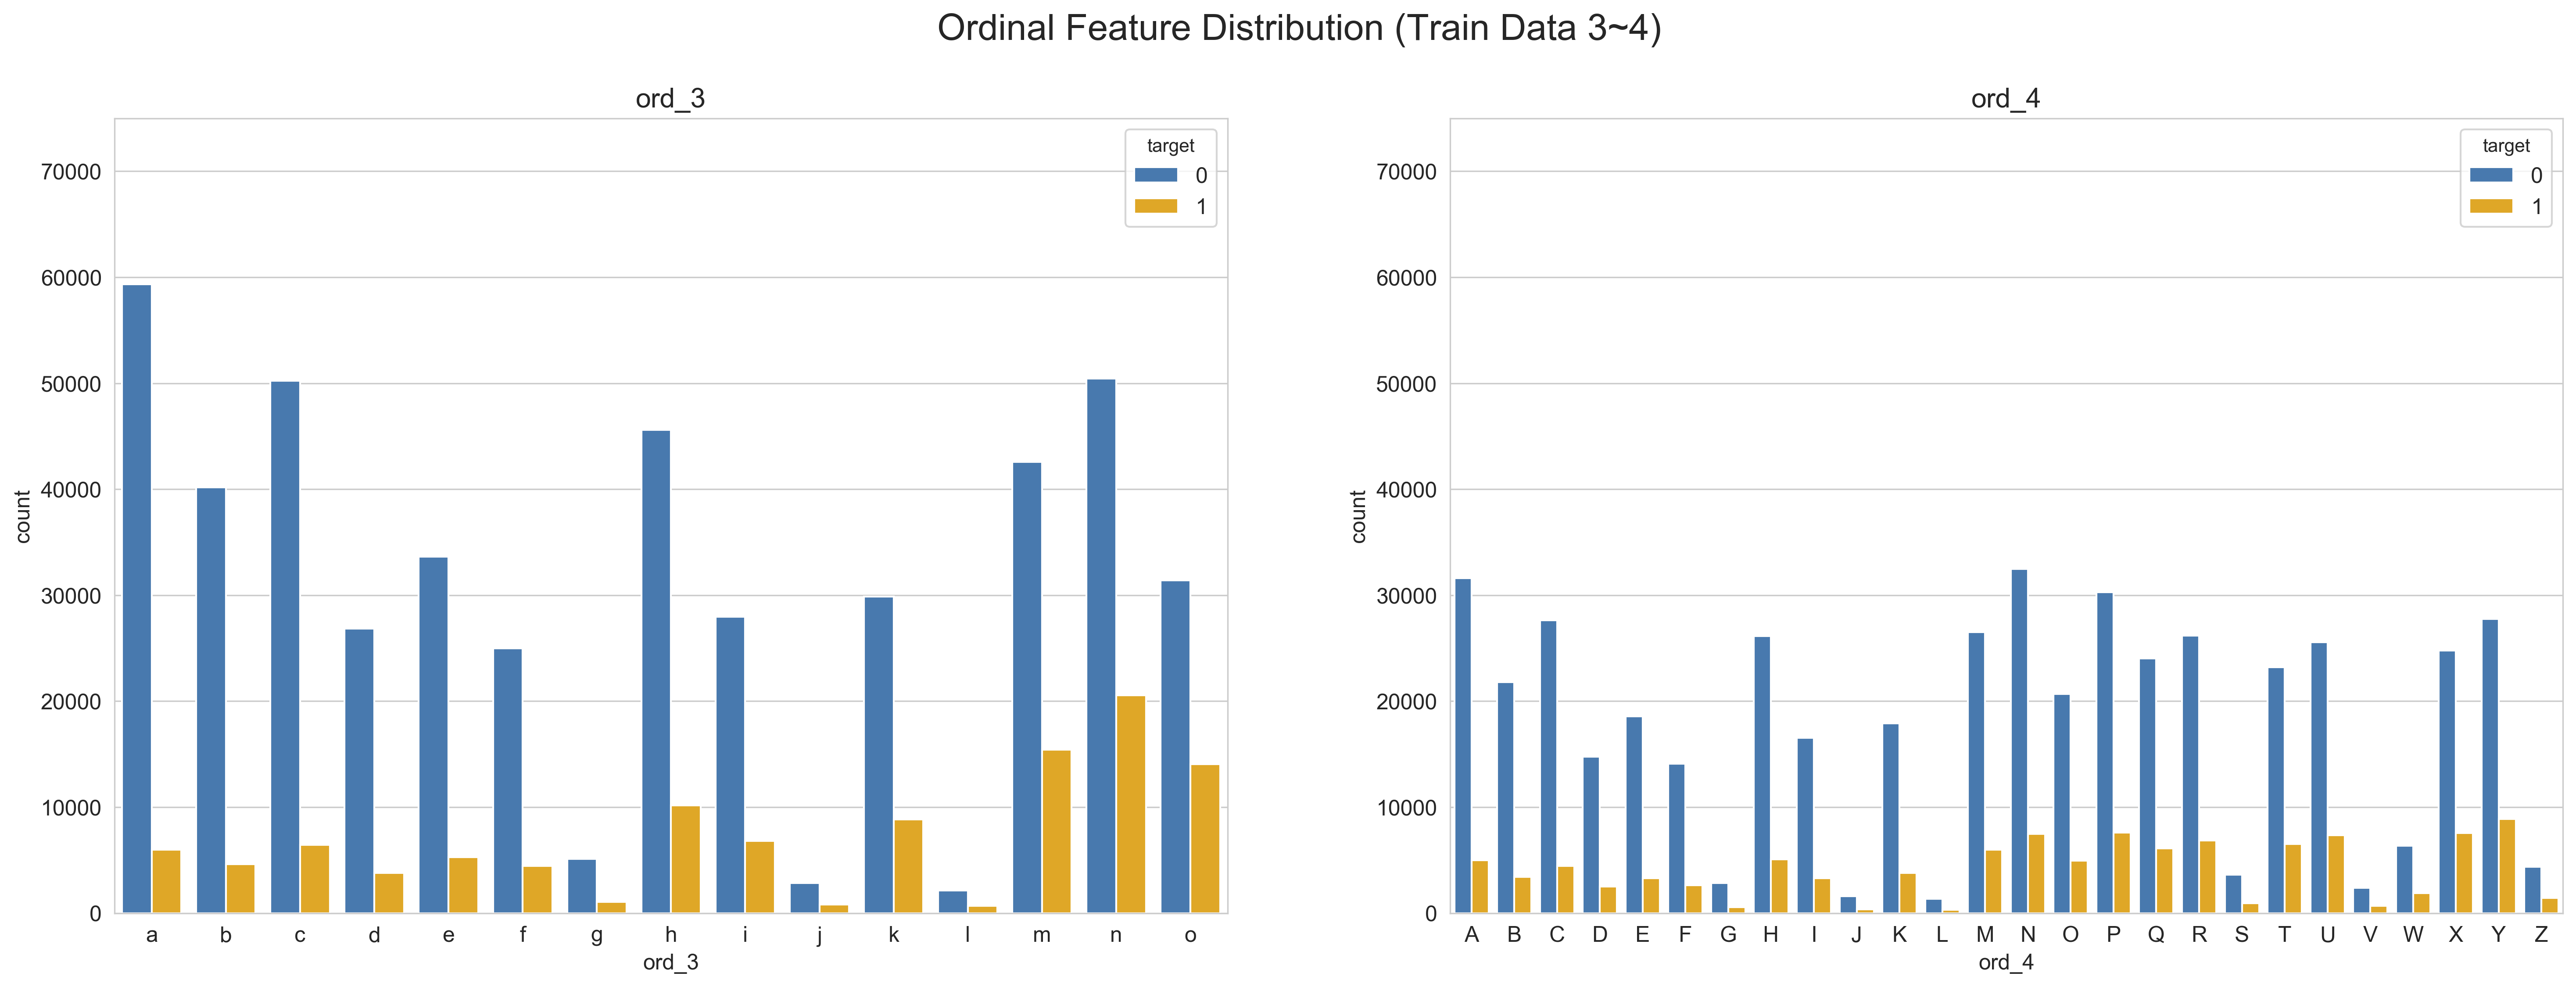

In [21]:
fig, ax = plt.subplots(1,2, figsize=(24, 8))

for i in range(3, 5): 
    sns.countplot(f'ord_{i}', hue='target', data= train, ax=ax[i-3],
                  order = sorted(train[f'ord_{i}'].dropna().unique())
                 )
    ax[i-3].set_ylim([0, 75000])
    ax[i-3].set_title(f'ord_{i}', fontsize=15)
fig.suptitle("Ordinal Feature Distribution (Train Data 3~4)", fontsize=20)
plt.show()

In [22]:
for i in range(5):
    data = train[[f'ord_{i}', 'target']].groupby(f'ord_{i}')['target'].value_counts().unstack()
    data['rate'] = data[1]  / (data[0] + data[1] )
    data.sort_values(by=['rate'], inplace=True)
    display(data.style.highlight_max(color='lightgreen').highlight_min(color='#cd4f39'))

target,0,1,rate
ord_0,,,
1.0,195539,32378,0.14206
2.0,126900,29097,0.186523
3.0,150371,47427,0.239775


target,0,1,rate
ord_1,,,
Novice,135540,25057,0.156024
Contributor,90825,18996,0.172972
Expert,113178,26499,0.189716
Master,59913,16085,0.21165
Grandmaster,73561,22305,0.232669


target,0,1,rate
ord_2,,,
Freezing,123850,18876,0.132253
Cold,82933,14889,0.152205
Warm,102447,21792,0.175404
Hot,53657,13851,0.205176
Boiling Hot,64101,20689,0.244003
Lava Hot,45987,18853,0.290762


target,0,1,rate
ord_3,,,
a,59344,5977,0.091502
b,40186,4609,0.102891
c,50241,6434,0.113524
d,26833,3801,0.124078
e,33632,5272,0.135513
f,25002,4448,0.151036
g,5118,1062,0.171845
h,45594,10150,0.182082
i,27947,6816,0.196071


target,0,1,rate
ord_4,,,
B,21787,3425,0.135848
A,31625,5008,0.136707
C,27649,4463,0.138982
D,14774,2510,0.145221
E,18586,3285,0.150199
F,14102,2619,0.156629
G,2855,549,0.161281
H,26125,5064,0.162365
I,16528,3277,0.165463


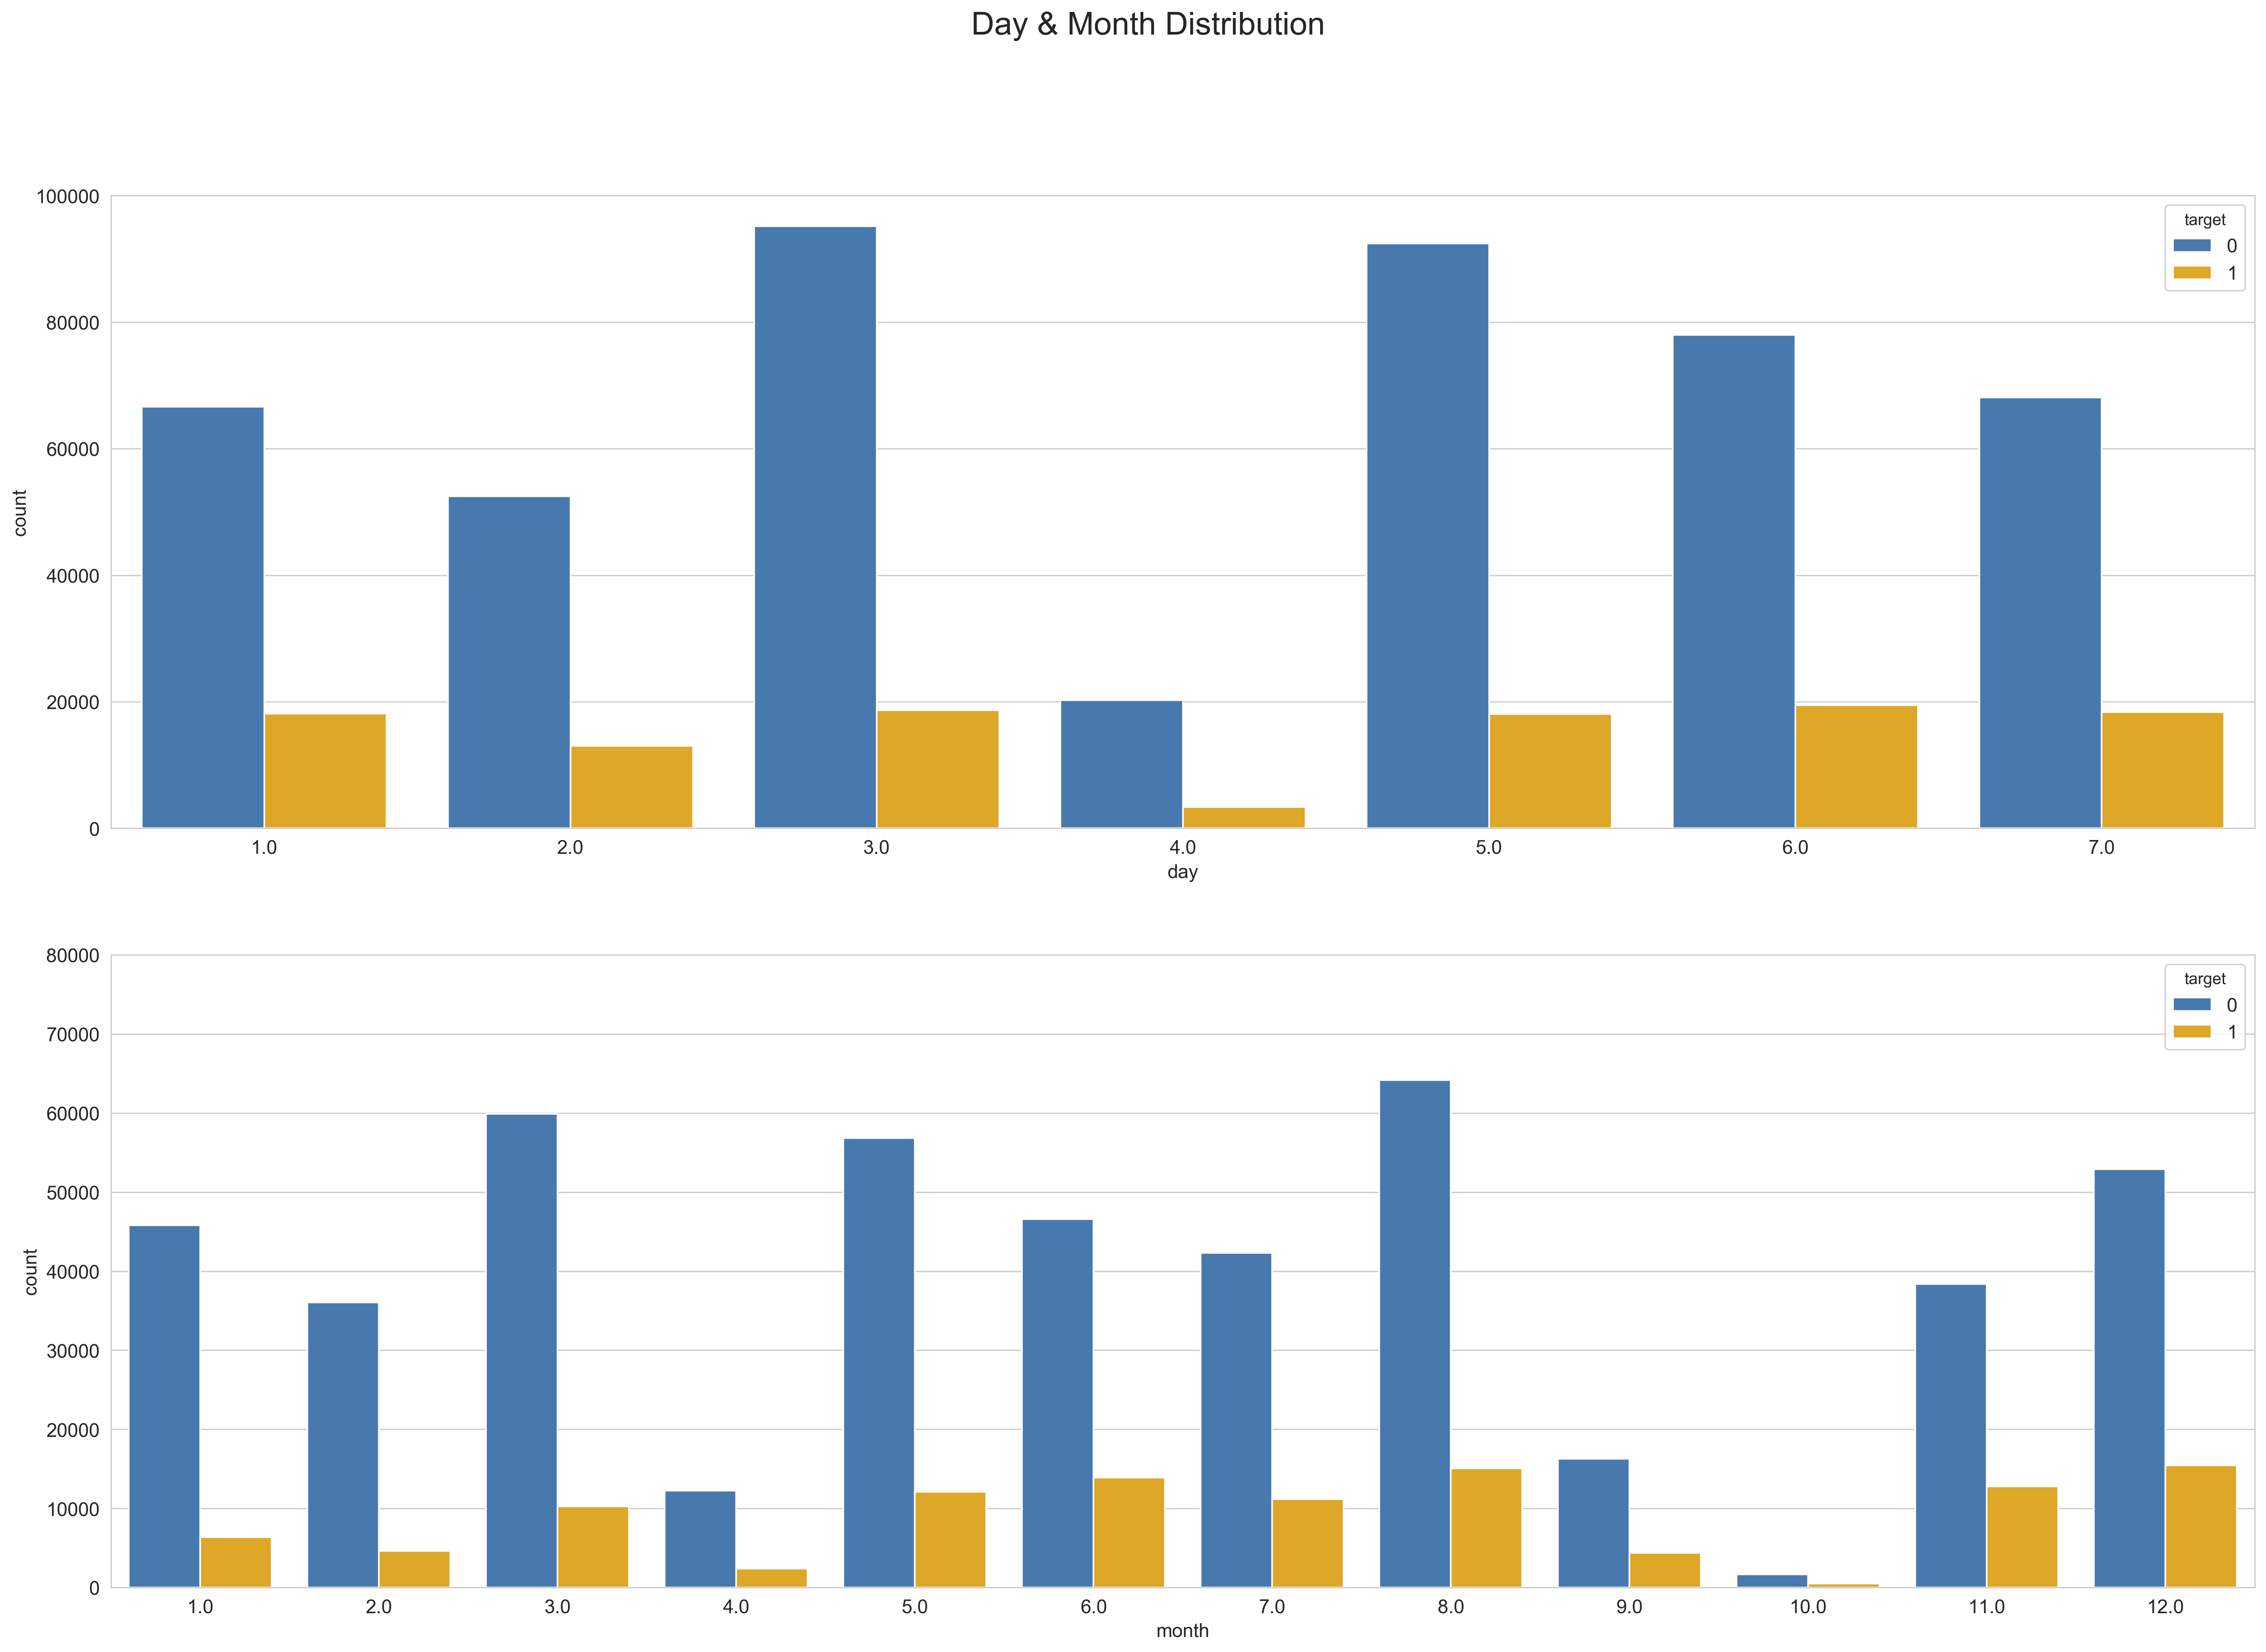

In [23]:
# Day & Month

fig, ax = plt.subplots(2,1, figsize=(24, 16))

sns.countplot('day', hue='target', data= train, ax=ax[0])
ax[0].set_ylim([0, 100000])

sns.countplot('month', hue='target', data= train, ax=ax[1])
ax[1].set_ylim([0, 80000])

fig.suptitle("Day & Month Distribution", fontsize=20)
plt.show()